# 플젝1. PM 개선사항에 대한 설문조사 분석
### 목적
* 실제 PM을 이용하는 이용자, 보행자, 운전자들의 PM과 관련된 인식의 차이를 알기 위해서 설문조조사 실시

### 조사대상 및 기간
* 조사대상
    * 이용자 총 000부 중 결측설문 00부제외 000부 분석에 사용
    * 운전자 ~~ 
    * 보행자 ~~
* 조사기간: 11월 30일 ~ 12월 30일

### 조사방법
* 온라인 구글폼 설문과 대면설문 동시 진행
* 무작위표본추출방법을 사용하여 연구표본 추출 
    * 충북대학교 학생들 대상 무작위 설문
    * 오픈채팅방(캐글코리아, 대학생 인공지능 / 빅데이터 정보 공유방, 사회조사분석사 2급필기, 정보처리기능사,산기,시사 정보 나눔방, 컴활/워드 자격증 따자하오! 외 10개이상의 오픈채팅방), 
    * 도로교통공단 운전자교육대상(12/10 고령운전자, 17(현장참여), 21(통학버스), 22(음주1회), 23(벌점감경))

### 설문지설계
* 인적사항, PM 사고, PM통행, PM인프라 관련 문항으로 구분하여 직접 작성

### 분석방법
* 문항항목별 빈도분석 실시
* 서술형 문항에 대한 워드클라우드 시각화
* 교차분석을 통한 분석 -> 성별, 이용시간 or 외출시간별로 pm전용도로 찬성 반대 및 인프라 구축에 관한 분석

## 이용자 분석

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import re

from wordcloud import WordCloud
from konlpy.tag import Twitter
from collections import Counter
from PIL import Image

%matplotlib inline
plt.rc('font', family='Malgun Gothic')

In [15]:
from ckonlpy.tag import Twitter

In [16]:
path = r'C:/Users/user/Desktop/플젝용_데이터/설문조사/'
df_이용자 = pd.read_csv(path + '이용자_colname변경.csv', encoding = 'CP949', index_col = False)
print(df_이용자.shape)
print(df_이용자.columns)
df_이용자.head()

(107, 28)
Index(['Unnamed: 0', '작성일시', '성별', '연령', '3. 자동차 운전면허가 있으십니까? ', '면허취득기간',
       '무면허이용', 'PM실제이용기간', 'PM얼마나자주', '평균주행시간', 'PM이용목적', 'PM사고', 'PM사고횟수',
       'PM사고원인', 'PM사고위치', 'PM아차사고', 'PM아차사고횟수', 'PM아차사고원인', 'PM아차사고위치',
       'PM주이용도로', 'PM주이용도로_이유', 'PM주이용도로_반대이유', 'PM개선사항', 'PM전용도로찬/반',
       '전용도로찬/반_이유', '전용도로위치', '전용도로위치_이유', '추가의견'],
      dtype='object')


,Unnamed: 0,작성일시,성별,연령,3. 자동차 운전면허가 있으십니까?,면허취득기간,무면허이용,PM실제이용기간,PM얼마나자주,평균주행시간,...,PM아차사고위치,PM주이용도로,PM주이용도로_이유,PM주이용도로_반대이유,PM개선사항,PM전용도로찬/반,전용도로찬/반_이유,전용도로위치,전용도로위치_이유,추가의견
0,1,12-1-2021 17:48:49,남자,25세,예,5.0,예,6개월 이상 ~ 1년 미만,주 1회 미만,5,...,차도,보도(인도),인도가 편해서,차도는 위험해서 잘 안다니게 됩니다,"도로/보도 환경 개선, 운영방식 개선 (방치 PM 즉시수거 등)",찬성,인도와 차도 모두 위험성이 있으므로 새로운 도로가필요함,차도,인도에는 자리가 없을듯,.
1,2,12-1-2021 18:17:42,남자,20세,아니오,0.0,예,1개월 이상 ~ 6개월 미만,주 1 ~ 2회,10,...,NaN,보도(인도),인도가 타기 편해서,차도는 위험하니깐?,"도로/보도 환경 개선, 운영방식 개선 (방치 PM 즉시수거 등)",반대,지금도 편하게 타고있는데 굳이 만들어야하나 싶음,차도,인도에는 만들공간이 없을거같다,"전동킥보드 두명 타는거 제지하는거랑, 아무데나 주차하는건 문제라고 생각함.."
2,4,12-1-2021 20:40:32,여자,24세,아니오,0.0,예,6개월 이상 ~ 1년 미만,주 1 ~ 2회,25,...,NaN,보도(인도),차도는 위험하고 자전거도로는 많이 없어서,차도는 위험하고 자전거도로는 많이 없어서,"도로/보도 환경 개선, 대중교통 환승 연계",찬성,전용도로가 있다면 더 안전하고 편리할 것 같다.,보도(인도),차도는 사고가 날 위험이 더 높을 것 같다.,NaN
3,5,12-1-2021 22:30:59,남자,26세,예,6.0,예,1개월 미만,주 1회 미만,5,...,NaN,이면도로(골목길),정류장에 가기 위해,위험해서,"사고시 보험 문제 개선, 도로/보도 환경 개선",찬성,보도에서도 천천히 주행해야해서,차도,차도쪽이 그나마 나아보입니다,NaN
4,6,12-1-2021 23:03:51,여자,29세,예,5.0,아니오,1개월 미만,주 1회 미만,20,...,이면도로(골목길),자전거 전용도로,편함,도로는 오토바이가 험하게 다님,"사고시 보험 문제 개선, 도로/보도 환경 개선",찬성,차량과 자전거 사이라 도로 사용 힘듦,보도(인도),자전거도로처럼 생기면 좋을 것 같음,정차하는 규정 필요.인도중앙에 둬 노약자 부상 우려있음


In [17]:
# 컬럼명 변경 
df_이용자 = df_이용자.rename({'3. 자동차 운전면허가 있으십니까? ': '면허소지여부'}, axis = 'columns')

In [18]:
df_이용자.head(2)

,Unnamed: 0,작성일시,성별,연령,면허소지여부,면허취득기간,무면허이용,PM실제이용기간,PM얼마나자주,평균주행시간,...,PM아차사고위치,PM주이용도로,PM주이용도로_이유,PM주이용도로_반대이유,PM개선사항,PM전용도로찬/반,전용도로찬/반_이유,전용도로위치,전용도로위치_이유,추가의견
0,1,12-1-2021 17:48:49,남자,25세,예,5.0,예,6개월 이상 ~ 1년 미만,주 1회 미만,5,...,차도,보도(인도),인도가 편해서,차도는 위험해서 잘 안다니게 됩니다,"도로/보도 환경 개선, 운영방식 개선 (방치 PM 즉시수거 등)",찬성,인도와 차도 모두 위험성이 있으므로 새로운 도로가필요함,차도,인도에는 자리가 없을듯,.
1,2,12-1-2021 18:17:42,남자,20세,아니오,0.0,예,1개월 이상 ~ 6개월 미만,주 1 ~ 2회,10,...,NaN,보도(인도),인도가 타기 편해서,차도는 위험하니깐?,"도로/보도 환경 개선, 운영방식 개선 (방치 PM 즉시수거 등)",반대,지금도 편하게 타고있는데 굳이 만들어야하나 싶음,차도,인도에는 만들공간이 없을거같다,"전동킥보드 두명 타는거 제지하는거랑, 아무데나 주차하는건 문제라고 생각함.."


###  데이터 전처리

<AxesSubplot:>

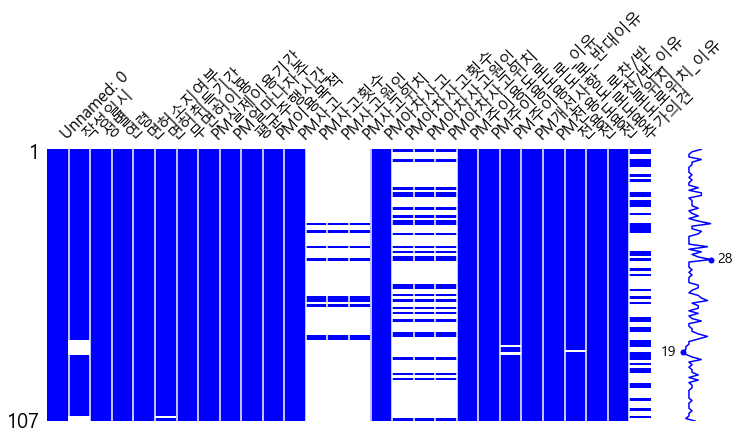

In [19]:
import missingno as msno

# NAN 값 시각화
msno.matrix(df_이용자, figsize=(12,5), color=(0,0,1)) # color = rgb

In [20]:
# 연령 -> 범주화
df_이용자['연령']

0      25세
1      20세
2      24세
3      26세
4      29세
      ... 
102    27세
103    23세
104    23세
105    23세
106    25세
Name: 연령, Length: 107, dtype: object

In [21]:
# 면허취득기간 -> 어떻게 전처리해야하나 고민됨 
df_이용자.면허취득기간.unique()

array([ 5. ,  0. ,  6. , 10. ,  7. , 30. ,  8. ,  9. , 16. ,  0.5,  2. ,
       13. , 11. ,  4. ,  3. ,  1. , 12. ,  nan])

In [22]:
df_이용자['면허취득기간'] = df_이용자['면허취득기간'].fillna(0)

In [23]:
df_이용자['면허취득기간'].unique()

array([ 5. ,  0. ,  6. , 10. ,  7. , 30. ,  8. ,  9. , 16. ,  0.5,  2. ,
       13. , 11. ,  4. ,  3. ,  1. , 12. ])

In [24]:
df_이용자['평균주행시간'].unique()

array([  5,  10,  25,  20,  15,  60, 120,   3,  30,   4,   8,   2,   7,
         1,  18,  17,  16,  13,   9,  21,  14,  12,  11], dtype=int64)

In [25]:
df_이용자['평균주행시간'].describe()

count    107.000000
mean      17.289720
std       17.710465
min        1.000000
25%       10.000000
50%       14.000000
75%       20.000000
max      120.000000
Name: 평균주행시간, dtype: float64

In [26]:
# PM 이용목적
df_이용자['PM이용목적'].value_counts()

쇼핑 및 볼일                                                27
등하교                                                    20
레져용                                                    17
정류장/지하철역 접근                                            17
출퇴근                                                    13
심심할때 친구들이랑 노는 위주                                        2
취미                                                      1
쇼핑 및 볼일                                                 1
택시 타기 애매한 위치에서 이동할때                                     1
이동                                                      1
업무용                                                     1
버스가 잘 다니지 않거나 버스를 타더라도 한~두 정거장 거리인 곳으로의 이동              1
집근처 볼일                                                  1
근거리 이동                                                  1
교내 이동                                                   1
이동수단                                                    1
레저용                                                     1
Name: PM이용목적, 

In [27]:
df_이용자['PM이용목적'] = df_이용자['PM이용목적'].str.strip()

In [28]:
mapping = {'쇼핑 및 볼일' : '쇼핑 및 볼일',
           '정류장/지하철역 접근' : '정류장/지하철역 접근', 
           '등하교' : '등하교(출퇴근)',
           '출퇴근' : '등하교(출퇴근)',
           '심심할때 친구들이랑 노는 위주' : '쇼핑 및 볼일',
           '업무용' : '쇼핑 및 볼일',
           '교내 이동' : '이동용',
           '이동' : '이동용',
           '이동수단' :'이동용',
           '버스가 잘 다니지 않거나 버스를 타더라도 한~두 정거장 거리인 곳으로의 이동' : '이동용',
           '근거리 이동' : '이동용',
           '택시 타기 애매한 위치에서 이동할때': '이동용',
           '취미' : '레져용',
           '레저용': '레져용',
           '레져용': '레져용',
           '집근처 볼일' : '쇼핑 및 볼일'}
df_이용자['PM이용목적'] = df_이용자['PM이용목적'].map(mapping)

In [29]:
df_이용자['PM이용목적'].unique()

array(['쇼핑 및 볼일', '정류장/지하철역 접근', '등하교(출퇴근)', '레져용', '이동용'], dtype=object)

In [30]:
# 'PM사고', 'PM사고횟수','PM사고원인', 'PM사고위치', 'PM아차사고', 'PM아차사고횟수', 'PM아차사고원인', 'PM아차사고위치'
df_이용자['PM사고'].value_counts()

아니오    98
예       9
Name: PM사고, dtype: int64

In [31]:
df_이용자['PM사고횟수'].value_counts()

1.0    7
2.0    1
3.0    1
Name: PM사고횟수, dtype: int64

In [32]:
df_이용자['PM사고원인'].unique()

array([nan, '도로 상태 요인(시설물 혹은 노면 상태 불량 등)', '보행자'], dtype=object)

In [33]:
df_이용자['PM사고위치'].unique()

array([nan, '보도(인도)', '자전거 전용도로', '이면도로(골목길)', '교내'], dtype=object)

In [34]:
df_이용자['PM아차사고'].value_counts()

아니오    80
예      27
Name: PM아차사고, dtype: int64

In [35]:
df_이용자['PM아차사고횟수'].unique()

array(['2', nan, '1', '1번', '3', '5'], dtype=object)

In [36]:
df_이용자['PM아차사고횟수'][23] = df_이용자.loc[df_이용자['PM아차사고횟수'] == '1번']['PM아차사고횟수'][23].split('번')[0]

C:\Users\user\AppData\Local\Temp/ipykernel_7680/1849752231.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_이용자['PM아차사고횟수'][23] = df_이용자.loc[df_이용자['PM아차사고횟수'] == '1번']['PM아차사고횟수'][23].split('번')[0]


In [37]:
df_이용자['PM아차사고횟수'][28] = df_이용자.loc[df_이용자['PM아차사고횟수'] == '1번']['PM아차사고횟수'][28].split('번')[0]

C:\Users\user\AppData\Local\Temp/ipykernel_7680/3864570675.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_이용자['PM아차사고횟수'][28] = df_이용자.loc[df_이용자['PM아차사고횟수'] == '1번']['PM아차사고횟수'][28].split('번')[0]


In [38]:
df_이용자['PM아차사고횟수'].unique()

array(['2', nan, '1', '3', '5'], dtype=object)

In [39]:
df_이용자['PM아차사고원인'].unique()

array(['전동킥보드 사용자', nan, '도로 상태 요인(시설물 혹은 노면 상태 불량 등)', '자동차 운전자', '보행자'],
      dtype=object)

In [40]:
df_이용자['PM아차사고위치'].unique()

array(['차도', nan, '이면도로(골목길)', '보도(인도)', '횡단보도', '자전거 전용도로'], dtype=object)

In [41]:
df_이용자['PM주이용도로'].value_counts()

보도(인도)       51
차도           25
자전거 전용도로     20
이면도로(골목길)    11
Name: PM주이용도로, dtype: int64

In [42]:
df_이용자['PM개선사항'].value_counts()

사고시 보험 문제 개선, 도로/보도 환경 개선                     29
도로/보도 환경 개선, 법 제도 개선(PM 정기점검 등)               10
도로/보도 환경 개선, 운영방식 개선 (방치 PM 즉시수거 등)            8
사고시 보험 문제 개선, 도로/보도 환경 개선                      8
사고시 보험 문제 개선, 법 제도 개선(PM 정기점검 등)               6
도로/보도 환경 개선, 편리성 증대(헬맷 미착용 등)                  6
도로/보도 환경 개선, PM 장비 개선 (바람 가림막 등)               5
사고시 보험 문제 개선, PM 장비 개선 (바람 가림막 등)              5
도로/보도 환경 개선, 대중교통 환승 연계                        5
PM 장비 개선 (바람 가림막 등), 법 제도 개선(PM 정기점검 등)        5
사고시 보험 문제 개선, 운영방식 개선 (방치 PM 즉시수거 등)           2
대중교통 환승 연계, 법 제도 개선(PM 정기점검 등)                 2
운영방식 개선 (방치 PM 즉시수거 등), 법 제도 개선(PM 정기점검 등)     2
사고시 보험 문제 개선, 편리성 증대(헬맷 미착용 등)                 2
편리성 증대(헬멧 미착용 등), 대중교통 환승 연계                   1
사고시 보험 문제 개선, 대중교통 환승 연계                       1
운영방식 개선 (방치 PM 즉시수거 등), 대중교통 환승 연계             1
도로/보도 환경 개선, 운영방식 개선(방치 PM 즉시 수거)              1
편리성 증대(헬멧 미착용 등), PM 장비 개선 (바람 가림막 등)          1
편리성 증대(헬맷 미착용 등), 법 제도 개선(PM 정기점검 등)           1
사고시 보험 문제 개선, PM 장비개

In [43]:
import numpy as np
pm개선사항 = []
pm개선사항 = df_이용자['PM개선사항'].apply(lambda x : x.split(',')[0]).str.strip()
pm개선사항 = pd.DataFrame(pm개선사항.value_counts().reset_index())
pm개선사항1 = []
pm개선사항1 = df_이용자['PM개선사항'].apply(lambda x : x.split(',')[1]).str.strip()
pm개선사항1 = pd.DataFrame(pm개선사항1.value_counts().reset_index())
df_pm개선사항 = pd.concat([pm개선사항, pm개선사항1])
df_pm개선사항 = df_pm개선사항.rename({'index': '목록'},axis = 'columns')
df_pm개선사항
df_pm개선사항['목록'].unique()
df_pm개선사항.loc[df_pm개선사항['목록'] == '사고시 보험문제  개선', '목록'] = '사고시 보험 문제 개선'
df_pm개선사항.loc[df_pm개선사항['목록'] == 'PM 장비 개선 (바람 가림막 등)', '목록'] = 'PM 장비개선(바람 가림막 등)'
df_pm개선사항.loc[df_pm개선사항['목록'] == '운영방식 개선(방치 PM 즉시 수거)', '목록'] = '운영방식 개선 (방치 PM 즉시수거 등)'
df_pm개선사항.loc[df_pm개선사항['목록'] == '편리성 증대(헬멧 미착용 등)', '목록'] = '편리성 증대(헬맷 미착용 등)'
df_pm개선사항 = df_pm개선사항.groupby('목록').sum()

In [44]:
pm개선사항1 = []
pm개선사항1 = df_이용자['PM개선사항'].apply(lambda x : x.split(',')[1]).str.strip()
pm개선사항1 = pd.DataFrame(pm개선사항1.value_counts().reset_index())

In [45]:
df_pm개선사항 = pd.concat([pm개선사항, pm개선사항1])
df_pm개선사항 = df_pm개선사항.rename({'index': '목록'},axis = 'columns')
df_pm개선사항

,목록,PM개선사항
0,사고시 보험 문제 개선,54
1,도로/보도 환경 개선,37
2,PM 장비 개선 (바람 가림막 등),5
3,운영방식 개선 (방치 PM 즉시수거 등),4
4,편리성 증대(헬맷 미착용 등),2
5,대중교통 환승 연계,2
6,편리성 증대(헬멧 미착용 등),2
7,사고시 보험문제 개선,1
0,도로/보도 환경 개선,37
1,법 제도 개선(PM 정기점검 등),27


In [46]:
df_pm개선사항['목록'].unique()
df_pm개선사항.loc[df_pm개선사항['목록'] == '사고시 보험문제  개선', '목록'] = '사고시 보험 문제 개선'
df_pm개선사항.loc[df_pm개선사항['목록'] == 'PM 장비 개선 (바람 가림막 등)', '목록'] = 'PM 장비개선(바람 가림막 등)'
df_pm개선사항.loc[df_pm개선사항['목록'] == '운영방식 개선(방치 PM 즉시 수거)', '목록'] = '운영방식 개선 (방치 PM 즉시수거 등)'
df_pm개선사항.loc[df_pm개선사항['목록'] == '편리성 증대(헬멧 미착용 등)', '목록'] = '편리성 증대(헬맷 미착용 등)'
df_pm개선사항 = df_pm개선사항.groupby('목록').sum()

In [47]:
df_pm개선사항.loc[df_pm개선사항['목록'] == '사고시 보험문제  개선', '목록'] = '사고시 보험 문제 개선'
df_pm개선사항.loc[df_pm개선사항['목록'] == 'PM 장비 개선 (바람 가림막 등)', '목록'] = 'PM 장비개선(바람 가림막 등)'
df_pm개선사항.loc[df_pm개선사항['목록'] == '운영방식 개선(방치 PM 즉시 수거)', '목록'] = '운영방식 개선 (방치 PM 즉시수거 등)'
df_pm개선사항.loc[df_pm개선사항['목록'] == '편리성 증대(헬멧 미착용 등)', '목록'] = '편리성 증대(헬맷 미착용 등)'

KeyError: '목록'

In [48]:
df_pm개선사항 = df_pm개선사항.groupby('목록').sum()

In [49]:
df_pm개선사항

,PM개선사항
목록,
PM / 자전거 등 전용도로 개선,1
PM 장비개선(바람 가림막 등),18
대중교통 환승 연계,11
도로/보도 환경 개선,74
법 제도 개선(PM 정기점검 등),27
사고시 보험 문제 개선,55
운영방식 개선 (방치 PM 즉시수거 등),15
편리성 증대(헬맷 미착용 등),13


In [50]:
# df_pm개선사항.to_csv(path + 'df_pm개선사항.csv', encoding = 'cp949')

In [51]:
df_이용자['PM전용도로찬/반'].unique()

array(['찬성', '반대'], dtype=object)

In [52]:
df_이용자['전용도로위치'].unique()

array(['차도', '보도(인도)', '모르겠다', '자전거도로'], dtype=object)

### 문항별 빈도분석

### 이용자 인적사항 
#### 1-1. 당신의 성별은?

In [53]:
df_이용자['빈도 수'] = 1

In [54]:
이용자_성별 = pd.DataFrame(df_이용자.groupby('성별')['빈도 수'].count())
이용자_성별['비율'] = (이용자_성별['빈도 수'] / sum(이용자_성별['빈도 수'])) * 100

In [55]:
이용자_성별

,빈도 수,비율
성별,,
남자,73,68.224299
여자,34,31.775701


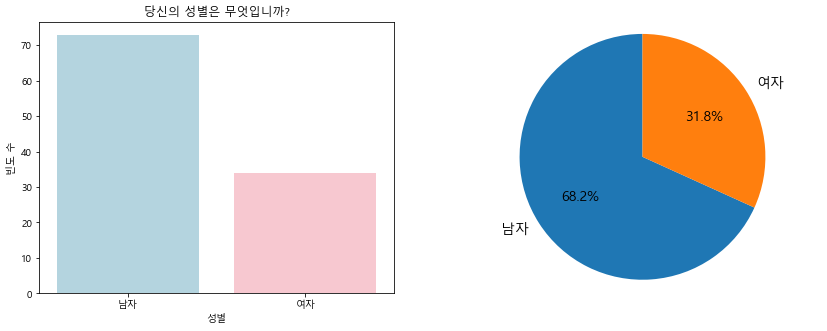

In [56]:
fig = plt.figure(figsize = (14,5))
ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(x=이용자_성별.index, y='빈도 수', data = 이용자_성별, palette=['lightblue', 'pink'])
ax1.set_title('당신의 성별은 무엇입니까?')

ax2 = fig.add_subplot(1,2,2)
ax2 = plt.pie(이용자_성별['비율'], labels = 이용자_성별.index,
              autopct = '%1.1f%%', textprops = {'fontsize': 14},
              shadow = False, startangle = 90)

plt.axis('equal')
plt.show()

* 이용자 설문 응답자 중 68.2% 남성, 31.8%는 여성이다.

#### 1-2. 귀하의 연령은?

In [57]:
연령 = []
for i in range(len(df_이용자['연령'])):
    i = df_이용자['연령'][i].split('세')[0]
    연령.append(i)
df_이용자['연령'] = 연령
df_이용자['연령'] = df_이용자['연령'].astype('int')

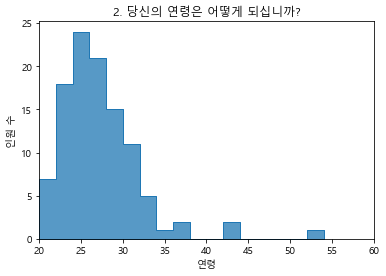

In [58]:
sns.histplot(df_이용자['연령'], element='step', kde = False)
plt.ylabel('인원 수')
plt.xlim(20,60)
plt.title('2. 당신의 연령은 어떻게 되십니까?')
plt.show()

In [59]:
df_이용자.loc[(df_이용자['연령'] >= 20) & (df_이용자['연령'] <= 29), '연령'] = 20
df_이용자.loc[(df_이용자['연령'] >= 30) & (df_이용자['연령'] <= 39), '연령'] = 30
df_이용자.loc[(df_이용자['연령'] >= 40) & (df_이용자['연령'] <= 49), '연령'] = 40
df_이용자.loc[(df_이용자['연령'] >= 50) & (df_이용자['연령'] <= 59), '연령'] = 50

df_이용자['연령'] = df_이용자['연령'].astype('str')
df_이용자['연령'] = df_이용자['연령'] + '대'

In [60]:
df_이용자['연령'].unique()

array(['20대', '30대', '50대', '40대'], dtype=object)

In [61]:
연령 = pd.DataFrame(df_이용자.groupby('연령')['빈도 수'].sum())
연령['비율'] = 연령['빈도 수'] / sum(연령['빈도 수']) * 100 

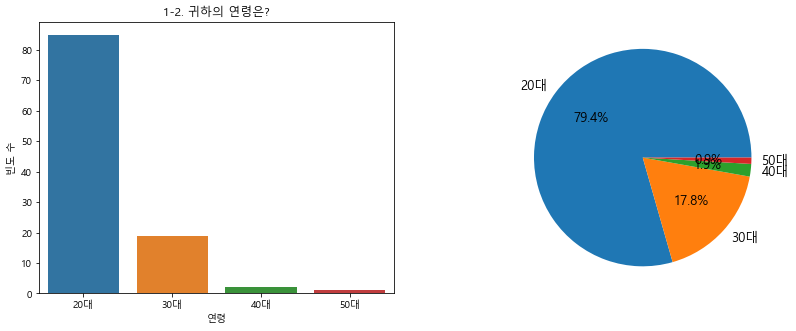

In [62]:
fig = plt.figure(figsize=(14,5))

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(x=연령.index, y= 연령['빈도 수'], data = 연령)
ax1 = plt.title('1-2. 귀하의 연령은?')

ax2 = fig.add_subplot(1,2,2)
ax2 = plt.pie(연령['비율'], labels=연령.index,
              autopct="%1.1f%%", textprops={'fontsize':13})

* pm이용자 응답자 중 79.4%가 20대임.

#### 1-3. 자동차 운전면허가 있으십니까?

In [63]:
면허소지 = pd.DataFrame(df_이용자.groupby('면허소지여부')['빈도 수'].count())
면허소지['비율'] = 면허소지['빈도 수'] / sum(면허소지['빈도 수']) * 100 

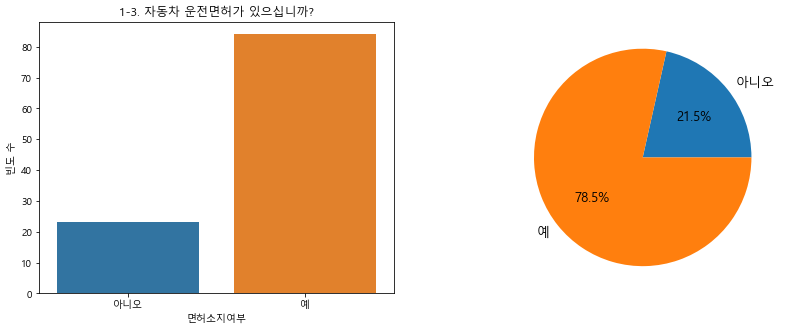

In [64]:
fig = plt.figure(figsize=(14,5))

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(x= 면허소지.index, y = '빈도 수', data = 면허소지)
ax1 = plt.title('1-3. 자동차 운전면허가 있으십니까?')

ax2 = fig.add_subplot(1,2,2)
ax2 = plt.pie(면허소지['비율'],labels=면허소지.index,
              autopct="%1.1f%%", textprops={'fontsize':13})
plt.show()

* 응답자 중 78.5%는 운전면허를 소지하고 있다고 응답하였음

#### 1-4. 자동차 운전면허를 취득한 지 얼마나 되었습니까?

In [65]:
df_이용자['면허취득기간'].describe()

count    107.000000
mean       5.023364
std        4.798970
min        0.000000
25%        1.000000
50%        5.000000
75%        7.000000
max       30.000000
Name: 면허취득기간, dtype: float64

<AxesSubplot:xlabel='면허취득기간', ylabel='Count'>

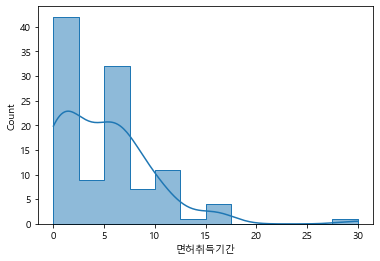

In [66]:
sns.histplot(df_이용자['면허취득기간'], kde=True, element='step')

* 응답자의 면허취득기간의 평균값은 5년, 최소값은 0, 최대값은 30으로 확인됨.

#### 1-5. 무면허로 PM을 이용해보신 적이 있으십니까?

In [67]:
무면허 = pd.DataFrame(df_이용자.groupby('무면허이용')['빈도 수'].sum()) 
무면허['비율'] = 무면허['빈도 수'] / sum(무면허['빈도 수']) * 100
무면허

,빈도 수,비율
무면허이용,,
아니오,89,83.17757
예,18,16.82243


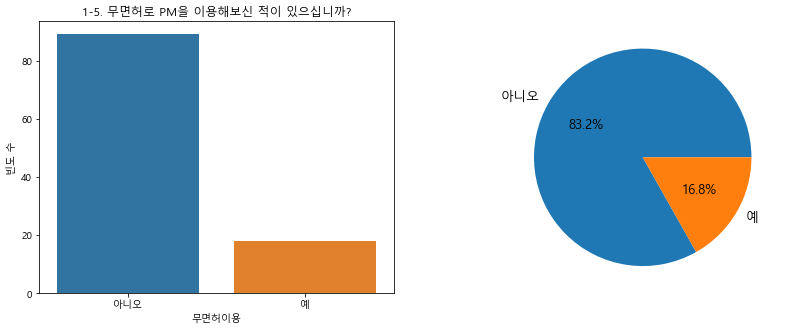

In [68]:
fig = plt.figure(figsize = (14,5))

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(x=무면허.index, y='빈도 수', data = 무면허)
ax1 = plt.title('1-5. 무면허로 PM을 이용해보신 적이 있으십니까?')

ax2 = fig.add_subplot(1,2,2)
ax2 = plt.pie(무면허['비율'], labels=무면허.index,
              autopct="%1.1f%%", textprops={'fontsize':13})

#### 1-6. PM을 실제로 이용한 기간은 얼마입니까?

In [69]:
실제이용기간 = pd.DataFrame(df_이용자.groupby('PM실제이용기간')['빈도 수'].sum())
실제이용기간 = 실제이용기간.sort_values(by='빈도 수', ascending = False)
실제이용기간['비율'] = 실제이용기간['빈도 수'] / sum(실제이용기간['빈도 수']) * 100  

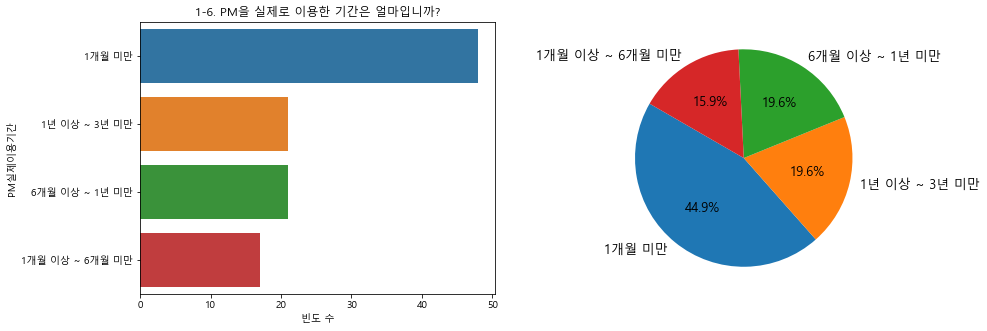

In [70]:
fig = plt.figure(figsize = (14,5))

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(x='빈도 수',y=실제이용기간.index, data = 실제이용기간)
ax1 = plt.title('1-6. PM을 실제로 이용한 기간은 얼마입니까?')

ax2 = fig.add_subplot(1,2,2)
ax2 = plt.pie(실제이용기간['비율'], labels=실제이용기간.index,
              autopct="%1.1f%%", textprops={'fontsize':13}, startangle=150)

#### 1-7. 일주일에 PM을 얼마나 자주 이용하십니까?

In [71]:
pm얼마나자주 = pd.DataFrame(df_이용자.groupby('PM얼마나자주')['빈도 수'].count())
pm얼마나자주['비율'] = pm얼마나자주['빈도 수'] / sum(pm얼마나자주['빈도 수']) * 100
pm얼마나자주 = pm얼마나자주.sort_values(by='빈도 수', ascending = False)

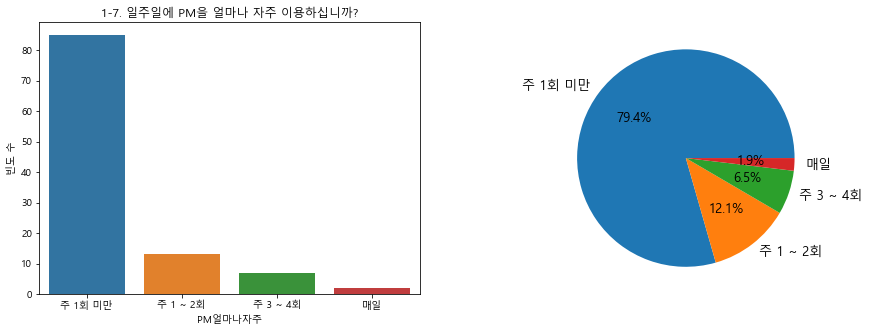

In [72]:
fig = plt.figure(figsize = (15,5))

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(x = pm얼마나자주.index, y = '빈도 수', data = pm얼마나자주)
ax1 = plt.title('1-7. 일주일에 PM을 얼마나 자주 이용하십니까?')

ax2 = fig.add_subplot(1,2,2)
ax2 = plt.pie(pm얼마나자주['비율'], labels=pm얼마나자주.index,
              autopct="%1.1f%%", textprops={'fontsize':13})

* 응답자 중 79.4%가 주 1회미만으로 이용한다고 응답하였음

#### 1-8. PM을 이용시 평균 주행시간이 대략 얼마입니까?

In [73]:
df_이용자['평균주행시간'].describe()

count    107.000000
mean      17.289720
std       17.710465
min        1.000000
25%       10.000000
50%       14.000000
75%       20.000000
max      120.000000
Name: 평균주행시간, dtype: float64

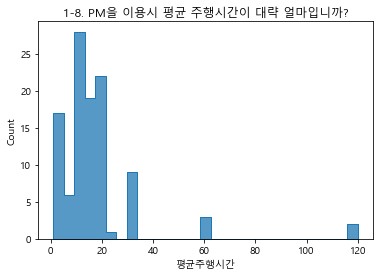

In [74]:
sns.histplot(df_이용자['평균주행시간'], element='step')
plt.title('1-8. PM을 이용시 평균 주행시간이 대략 얼마입니까?')
plt.show()

* 응답자의 평균주행시간의 평균은 17분, 최소값은 1분, 최대값은 120분으로 확인됨.

#### 1-9. PM을 주로 어떤 목적으로 활용하고 계십니까?

In [75]:
목적 = pd.DataFrame(df_이용자.groupby('PM이용목적')['빈도 수'].count())
목적 = 목적.sort_values(by='빈도 수', ascending=False)
목적['비율'] = 목적['빈도 수'] / sum(목적['빈도 수']) * 100

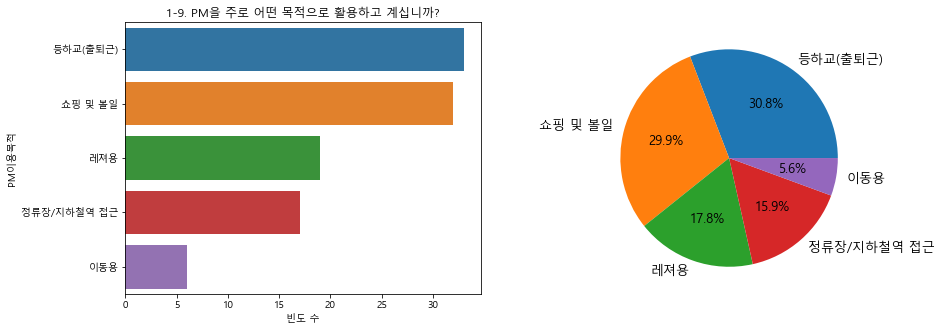

In [76]:
fig = plt.figure(figsize = (14,5))

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(x='빈도 수', y = 목적.index, data = 목적)
ax1 = plt.title('1-9. PM을 주로 어떤 목적으로 활용하고 계십니까?')

ax2 = fig.add_subplot(1,2,2)
ax2 = plt.pie(목적['비율'], labels=목적.index,
              autopct="%1.1f%%", textprops={'fontsize':13})

* 응답자 중 30.8%는 등하교(출퇴근), 29.9%는 쇼핑 및 볼일을 목적으로 PM을 이용한다고 응답하였음

### 2. PM 사고 관련 문항
#### 2-1. PM 이용 중에 사고가 난 경험이 있습니까?

In [77]:
pm사고 = pd.DataFrame(df_이용자.groupby('PM사고')['빈도 수'].count())
pm사고['비율'] = pm사고['빈도 수'] / sum(pm사고['빈도 수']) * 100

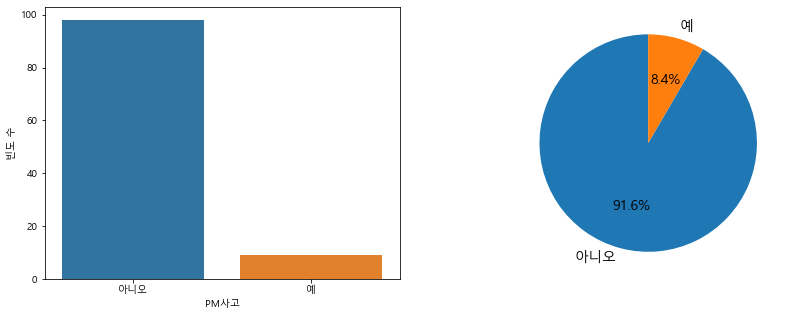

In [78]:
fig = plt.figure(figsize = (14,5))

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(x=pm사고.index,y='빈도 수', data=pm사고)

ax2 = fig.add_subplot(1,2,2)
ax2 = plt.pie(pm사고['비율'], labels = pm사고.index,
              autopct = '%1.1f%%', textprops = {'fontsize': 14},
              shadow = False, startangle = 90)

* 응답자 중 8.4% PM 이용 중에 사고를 경험한 적이 있다고 응답하였음. 

#### 2-2. 사고가 난 경험은 몇 번 정도 입니까?

In [79]:
사고횟수 = pd.DataFrame(df_이용자.groupby('PM사고횟수')['빈도 수'].count())
사고횟수['비율'] = 사고횟수['빈도 수'] / sum(사고횟수['빈도 수']) * 100 

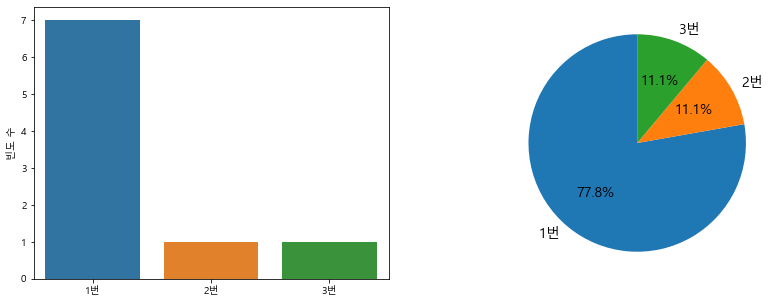

In [80]:
fig = plt.figure(figsize = (14,5))

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(x=['1번', '2번', '3번'], y='빈도 수', data=사고횟수)

ax2 = fig.add_subplot(1,2,2)
ax2 = plt.pie(사고횟수['비율'], labels = ['1번', '2번', '3번'],
              autopct = '%1.1f%%', textprops = {'fontsize': 14},
              shadow = False, startangle = 90)

* 사고를 경험하였다고 응답한 사람 중 77.8%는 1번 경험하였다고 함

#### 2-3. 충돌이나 사고 유발 상대 혹은 원인은 무엇입니까?

In [81]:
사고원인 = pd.DataFrame(df_이용자.groupby('PM사고원인')['빈도 수'].count())
사고원인['비율'] = 사고원인['빈도 수'] / sum(사고원인['빈도 수']) * 100 

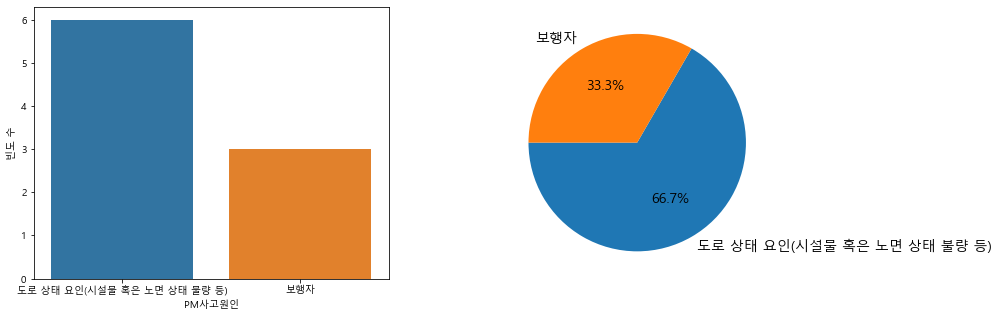

In [82]:
fig = plt.figure(figsize = (14,5))

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(x=사고원인.index, y='빈도 수', data=사고원인)

ax2 = fig.add_subplot(1,2,2)
ax2 = plt.pie(사고원인['비율'], labels = 사고원인.index,
              autopct = '%1.1f%%', textprops = {'fontsize': 14},
              shadow = False, startangle = 180)

* 사고를 경험하였다고 응답한 사람 중 사고 원인을 66.7%는 도로 상태 요인으로 응답하였음.

#### 2-4. PM 이용 중에 사고가 난 위치는 어디입니까?

In [83]:
사고위치 = pd.DataFrame(df_이용자.groupby('PM사고위치')['빈도 수'].count())
사고위치['비율'] = 사고위치['빈도 수'] / sum(사고위치['빈도 수']) * 100 
사고위치 = 사고위치.sort_values(by = '빈도 수', ascending = False)

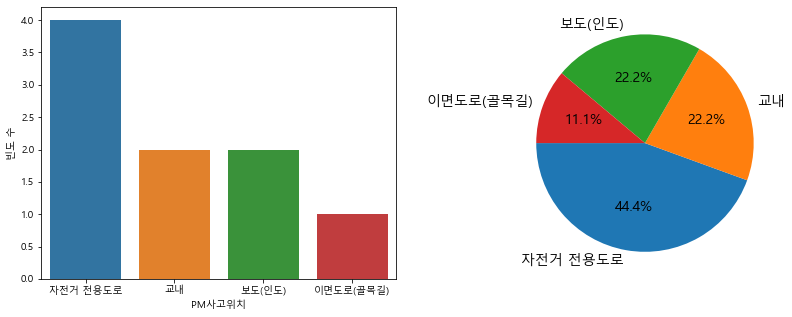

In [84]:
fig = plt.figure(figsize = (14,5))

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(x=사고위치.index, y='빈도 수', data=사고위치)

ax2 = fig.add_subplot(1,2,2)
ax2 = plt.pie(사고위치['비율'], labels = 사고위치.index,
              autopct = '%1.1f%%', textprops = {'fontsize': 14},
              shadow = False, startangle = 180)

* 사고를 경험하였다고 응답한 사람 중 사고 위치를 44.4%는 자전거 전용도로라고 응답하였음.

#### 2-5. PM 이용 중에 충돌이나 사고가 날 뻔한 적이 있습니까?

In [85]:
아차사고 = pd.DataFrame(df_이용자.groupby('PM아차사고')['빈도 수'].count())
아차사고['비율'] = 아차사고['빈도 수'] / sum(아차사고['빈도 수']) * 100

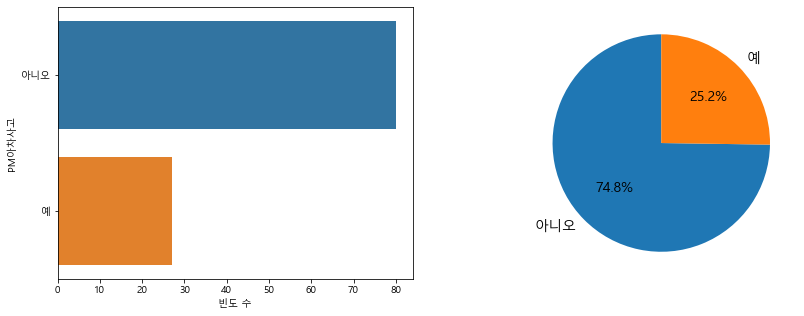

In [86]:
fig = plt.figure(figsize = (14,5))
ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(y=아차사고.index, x='빈도 수',  data=아차사고)

ax2 = fig.add_subplot(1,2,2)
ax2 = plt.pie(아차사고['비율'], labels = 아차사고.index,
              autopct = '%1.1f%%', textprops = {'fontsize': 14},
              shadow = False, startangle = 90)
plt.show()

* 응답자 중 25.2%가 이용 중에 아차사고를 경험한 적이 있다고 응답하였음.

#### 2-6.충돌이나 사고가 날 뻔한 경험은 몇 번 정도 입니까?

In [87]:
아차사고횟수 = pd.DataFrame(df_이용자.groupby('PM아차사고횟수')['빈도 수'].count())
아차사고횟수['비율'] = 아차사고횟수['빈도 수'] / sum(아차사고횟수['빈도 수']) * 100

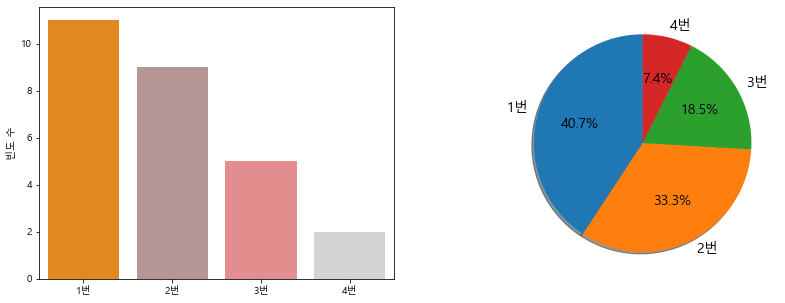

In [88]:
fig = plt.figure(figsize = (14,5))
ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(x=['1번', '2번', '3번', '4번'], y='빈도 수',  data=아차사고횟수, palette=['darkorange', 'rosybrown', 'lightcoral', 'lightgrey'])

ax2 = fig.add_subplot(1,2,2)
ax2 = plt.pie(아차사고횟수['비율'], labels = ['1번', '2번', '3번', '4번'],
              autopct = '%1.1f%%', textprops = {'fontsize': 14},
              shadow = True, startangle = 90, #colors = ['red', 'rosybrown', 'lightcoral', 'lightgrey']
              explode = (0.0,0.0,0.0,0.0))
plt.show()

* 아차사고를 경험하였다고 응답한 사람 중 40.7%는 1번 경험하였다고 함.

#### 2-7. PM 이용 중에 충돌이나 사고가 날 뻔한 위치는 어디입니까?

In [89]:
아차사고위치 = pd.DataFrame(df_이용자.groupby('PM아차사고위치')['빈도 수'].count())
아차사고위치['비율'] = 아차사고위치['빈도 수'] / sum(아차사고위치['빈도 수']) * 100
아차사고위치 = 아차사고위치.sort_values(by='빈도 수', ascending = False)

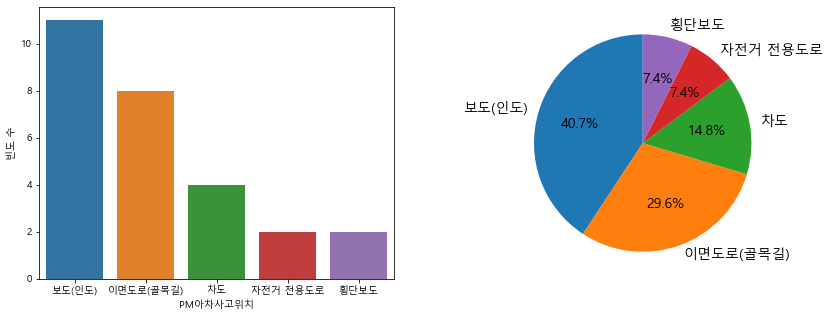

In [90]:
fig = plt.figure(figsize = (14,5))
ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(x=아차사고위치.index, y='빈도 수',  data=아차사고위치)

ax2 = fig.add_subplot(1,2,2)
ax2 = plt.pie(아차사고위치['비율'], labels = 아차사고위치.index,
              autopct = '%1.1f%%', textprops = {'fontsize': 14},
              shadow = False, startangle = 90)
plt.show()

* 아차사고를 경험한 사람 중 40.7%가 보도에서 경험했다고 응답하였음.

#### 2-8.충돌이나 사고를 유발할 뻔한 상대 혹은 원인은 무엇입니까?

In [91]:
아차사고원인 = pd.DataFrame(df_이용자.groupby('PM아차사고원인')['빈도 수'].count())
아차사고원인['비율'] = 아차사고원인['빈도 수'] / sum(아차사고원인['빈도 수']) * 100 

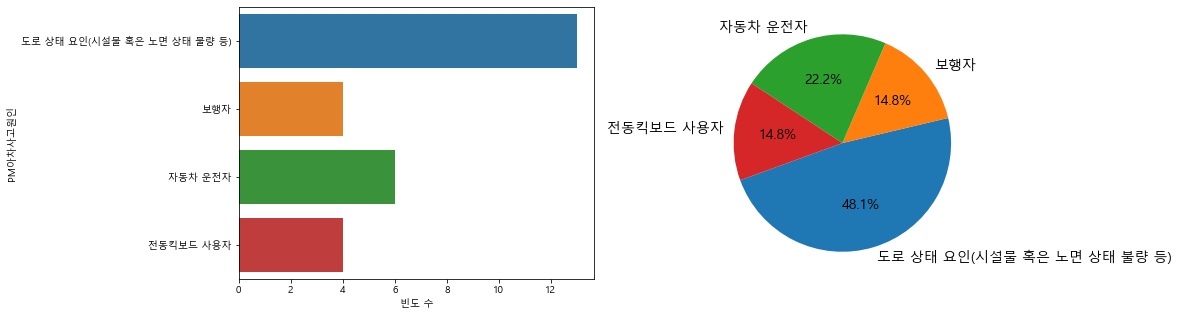

In [92]:
fig = plt.figure(figsize = (14,5))
ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(x='빈도 수', y=아차사고원인.index, data=아차사고원인)

ax2 = fig.add_subplot(1,2,2)
ax2 = plt.pie(아차사고원인['비율'], labels = 아차사고원인.index,
              autopct = '%1.1f%%', textprops = {'fontsize': 14},
              shadow = False, startangle = 200)
plt.show()

* 아차사고를 경험하였다고 응답한 사람 중 사고 원인을 48.1%는 도로상태요인이었다고 응답하였음.

#### 사고 + 아차사고

In [93]:
df_이용자['PM사고경험'] = 0 
df_이용자.loc[df_이용자['PM사고'] == '예', 'PM사고경험'] = 1 
df_이용자.loc[df_이용자['PM아차사고'] == '예', 'PM사고경험'] = 1

In [94]:
PM사고경험_전체 = pd.DataFrame(df_이용자.groupby('PM사고경험')['빈도 수'].count())
PM사고경험_전체['비율'] = PM사고경험_전체['빈도 수'] / sum(PM사고경험_전체['빈도 수']) * 100

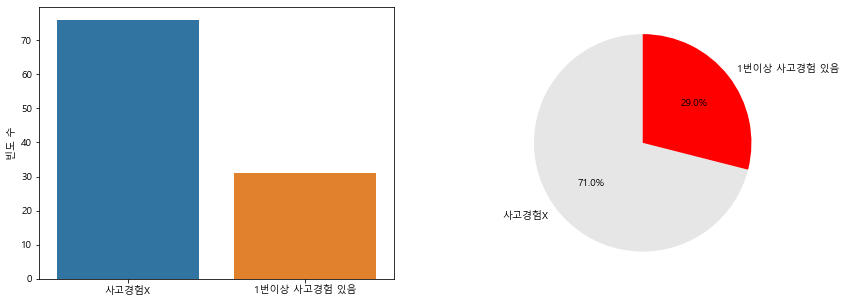

In [95]:
fig = plt.figure(figsize=(14,5))

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(x=['사고경험X', '1번이상 사고경험 있음'], y = '빈도 수', data=PM사고경험_전체)

ax2 = fig.add_subplot(1,2,2)
ax2 = plt.pie(PM사고경험_전체['비율'], labels =['사고경험X', '1번이상 사고경험 있음'],
      autopct="%1.1f%%", #colors=[(0.9,0.9,0.9), 'lightblue'], textprops = {'fontsize': 14},
      shadow = False, startangle = 90, colors = [(0.9,0.9,0.9), 'red'])

* pm 이용자 중 1번이상 사고 or 아차사고를 경험한 적이 있는 사람은 29%이다.

### 3. PM 이용 관련 문항
#### 3-1. PM을 어떤 곳에서 주로 이용하십니까? 

In [96]:
주이용도로 = pd.DataFrame(df_이용자.groupby('PM주이용도로')['빈도 수'].count())
주이용도로['비율'] = 주이용도로['빈도 수'] / sum(주이용도로['빈도 수']) * 100 
주이용도로 = 주이용도로.sort_values(by='빈도 수', ascending=False)

In [97]:
colors = ['red','lightgrey','lightgrey','lightgrey']
# 가장 높은거 하나만 색깔 다르게 

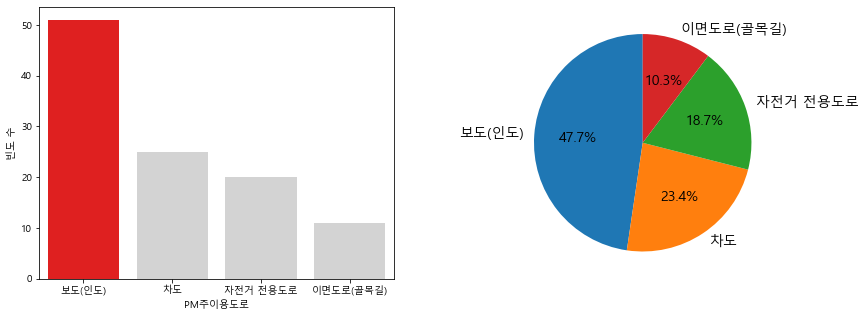

In [98]:
fig = plt.figure(figsize = (14,5))
ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(x = 주이용도로.index, y ='빈도 수', data = 주이용도로, palette=colors) 

ax2 = fig.add_subplot(1,2,2)
ax2 = plt.pie(주이용도로['비율'], labels = 주이용도로.index,
              autopct = '%1.1f%%', textprops = {'fontsize': 14},
              shadow = False, startangle = 90)

plt.show()

* 응답자 중 47.7%는 PM을 주로 이용하는 곳은 보도라고 응답하였음.

In [99]:
df_이용자.columns

Index(['Unnamed: 0', '작성일시', '성별', '연령', '면허소지여부', '면허취득기간', '무면허이용',
       'PM실제이용기간', 'PM얼마나자주', '평균주행시간', 'PM이용목적', 'PM사고', 'PM사고횟수', 'PM사고원인',
       'PM사고위치', 'PM아차사고', 'PM아차사고횟수', 'PM아차사고원인', 'PM아차사고위치', 'PM주이용도로',
       'PM주이용도로_이유', 'PM주이용도로_반대이유', 'PM개선사항', 'PM전용도로찬/반', '전용도로찬/반_이유',
       '전용도로위치', '전용도로위치_이유', '추가의견', '빈도 수', 'PM사고경험'],
      dtype='object')

#### 3-1. 문항에서 체크한 곳에서 많이 다닌 이유는 무엇입니까?

In [100]:
df_이용자['PM주이용도로'].unique()

array(['보도(인도)', '이면도로(골목길)', '자전거 전용도로', '차도'], dtype=object)

In [101]:
주이용보도 = df_이용자.loc[df_이용자['PM주이용도로'] == '보도(인도)']['PM주이용도로_이유']
주이용차도 = df_이용자.loc[df_이용자['PM주이용도로'] == '차도']['PM주이용도로_이유']
주이용자전거전용 = df_이용자.loc[df_이용자['PM주이용도로'] == '자전거 전용도로']['PM주이용도로_이유']
주이용이면도로 = df_이용자.loc[df_이용자['PM주이용도로'] == '이면도로(골목길)']['PM주이용도로_이유']

In [102]:
이용자_mask = np.array(Image.open('C:/Users/user/Desktop/WordCloud 마스크/킥보드.png'))

C:\Users\user\anaconda3\lib\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


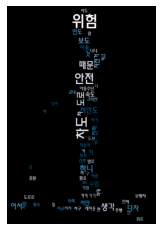

In [103]:
# 주로 보도로 다닌다 이유 시각화
text = 주이용보도
text =''.join(text)
name = "주이용보도"
colormap = 'PuBu'
twitter = Twitter()
        
twitter.add_dictionary('자전거전용도로', 'Noun')
twitter.add_dictionary('PM전용도로', 'Noun')
twitter.add_dictionary('이동수단', 'Noun')
twitter.add_dictionary('필요', 'Noun')
    
text_file = twitter.nouns(text)
text_file = pd.Series(text_file).value_counts()

stop_word = ["굳이", "같다", "함","것", "가", ".","이", "이용","생각", "을","다", "에","한", "와","도로","인도",
             "있으므로", "로운", "가필",'에서도',"에서","하고","에게", "으로","에서","위해","하지"]
    #사용하지 않을 단어 또는 문장 추가
# line = [i for i in text_file if i not in stop_word]

# tags = Counter(line).most_common()
# print(tags)


wc = WordCloud(font_path='C:/Windows/Fonts/HMFMMUEX.TTC',background_color="Black", colormap = colormap,
                  width=3000, height=2000, mask = 이용자_mask)
cloud = wc.generate_from_frequencies(dict(text_file))

plt.imshow(cloud) 
plt.axis('off')
plt.show()
cloud.to_file(f'C:/Users/user/Desktop/워드클라우드/PM이용자/{name}_{colormap}.jpg')

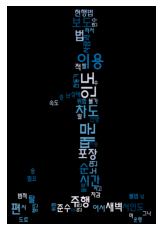

In [104]:
# 주로 차도로 다닌다 이유 시각화
text = 주이용차도
text =''.join(text)
name = "주이용차도"
colormap = "PuBu"
twitter = Twitter()
        
twitter.add_dictionary('자전거전용도로', 'Noun')
twitter.add_dictionary('PM전용도로', 'Noun')
twitter.add_dictionary('이동수단', 'Noun')
twitter.add_dictionary('필요', 'Noun')
    
text_file = twitter.nouns(text)
text_file = pd.Series(text_file).value_counts()

stop_word = ["굳이", "같다", "함","것", "가", ".","이", "이용","생각", "을","다", "에","한", "와","도로","인도",
             "있으므로", "로운", "가필",'에서도',"에서","하고","에게", "으로","에서","위해","하지"]
    #사용하지 않을 단어 또는 문장 추가
# line = [i for i in text_file if i not in stop_word]

# tags = Counter(line).most_common()
# print(tags)


wc = WordCloud(font_path='C:/Windows/Fonts/HMFMMUEX.TTC',background_color="Black",colormap = colormap,
                  width=3000, height=2000, mask = 이용자_mask)
cloud = wc.generate_from_frequencies(dict(text_file))

plt.imshow(cloud) 
plt.axis('off')
plt.show()
cloud.to_file(f'C:/Users/user/Desktop/워드클라우드/PM이용자/{name}_{colormap}.jpg')

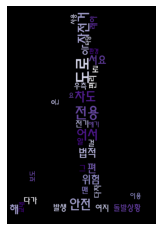

In [105]:
# 주로 자전거전용도로로 다닌다 이유 시각화
text = 주이용자전거전용
text =''.join(text)
name = "주이용자전거전용"
colormap = "Purples"
twitter = Twitter()
        
twitter.add_dictionary('자전거전용도로', 'Noun')
twitter.add_dictionary('PM전용도로', 'Noun')
twitter.add_dictionary('이동수단', 'Noun')
twitter.add_dictionary('필요', 'Noun')
    
text_file = twitter.nouns(text)
text_file = pd.Series(text_file).value_counts()

stop_word = ["굳이", "같다", "함","것", "가", ".","이", "이용","생각", "을","다", "에","한", "와","도로","인도",
             "있으므로", "로운", "가필",'에서도',"에서","하고","에게", "으로","에서","위해","하지"]
    #사용하지 않을 단어 또는 문장 추가
# line = [i for i in text_file if i not in stop_word]

# tags = Counter(line).most_common()
# print(tags)


wc = WordCloud(font_path='C:/Windows/Fonts/HMFMMUEX.TTC',background_color="Black",colormap = colormap,
                  width=3000, height=2000, mask = 이용자_mask)
cloud = wc.generate_from_frequencies(dict(text_file))

plt.imshow(cloud) 
plt.axis('off')
plt.show()
cloud.to_file(f'C:/Users/user/Desktop/워드클라우드/PM이용자/{name}_{colormap}.jpg')

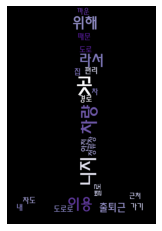

In [106]:
# 주로 이면도로(골목길)로 다닌다 이유 시각화
text = 주이용이면도로
text =''.join(text)
name = "주이용이면도로"
colormap = "Purples"
twitter = Twitter()
        
twitter.add_dictionary('자전거전용도로', 'Noun')
twitter.add_dictionary('PM전용도로', 'Noun')
twitter.add_dictionary('이동수단', 'Noun')
twitter.add_dictionary('필요', 'Noun')
    
text_file = twitter.nouns(text)
text_file = pd.Series(text_file).value_counts()

stop_word = ["굳이", "같다", "함","것", "가", ".","이", "이용","생각", "을","다", "에","한", "와","도로","인도",
             "있으므로", "로운", "가필",'에서도',"에서","하고","에게", "으로","에서","위해","하지"]
    #사용하지 않을 단어 또는 문장 추가
# line = [i for i in text_file if i not in stop_word]

# tags = Counter(line).most_common()
# print(tags)


wc = WordCloud(font_path='C:/Windows/Fonts/HMFMMUEX.TTC',background_color="Black",colormap = colormap,
                  width=3000, height=2000, mask = 이용자_mask)
cloud = wc.generate_from_frequencies(dict(text_file))

plt.imshow(cloud) 
plt.axis('off')
plt.show()
cloud.to_file(f'C:/Users/user/Desktop/워드클라우드/PM이용자/{name}_{colormap}.jpg')

#### 3-4. pm이용 시 개선할 사항이 있다면 체크해주십시오.

In [107]:
df_pm개선사항 = df_pm개선사항.sort_values(by='PM개선사항', ascending=False)
df_pm개선사항['비율'] = df_pm개선사항['PM개선사항'] / sum(df_pm개선사항['PM개선사항']) * 100
df_pm개선사항

,PM개선사항,비율
목록,,
도로/보도 환경 개선,74,34.579439
사고시 보험 문제 개선,55,25.700935
법 제도 개선(PM 정기점검 등),27,12.616822
PM 장비개선(바람 가림막 등),18,8.411215
운영방식 개선 (방치 PM 즉시수거 등),15,7.009346
편리성 증대(헬맷 미착용 등),13,6.074766
대중교통 환승 연계,11,5.140187
PM / 자전거 등 전용도로 개선,1,0.467290


In [108]:
colors = ['Blue','lightblue','lightgrey','lightgrey','lightgrey','lightgrey','lightgrey','lightgrey']

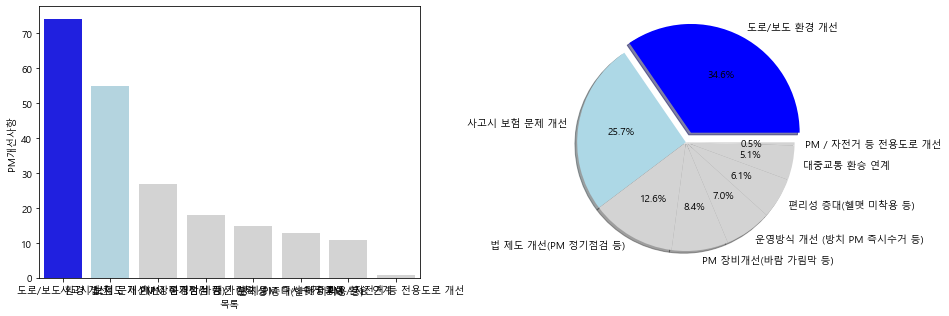

In [109]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(y='PM개선사항', x=df_pm개선사항.index, data = df_pm개선사항, palette=colors)

ax2 = fig.add_subplot(1,2,2)
ax2 = plt.pie(df_pm개선사항['비율'], labels = df_pm개선사항.index,
             autopct="%1.1f%%", colors = colors,
             explode = (0.1,0,0,0,0,0,0,0), shadow = True)
ax2 = plt.legend

plt.show()

### 4. PM 통행 인프라 관련 문항
#### 4-1. PM 전용도로의 필요성에 대해서 어떻게 생각하십니까? 

In [110]:
colors = ['red', 'lightgrey']

In [111]:
찬반 = pd.DataFrame(df_이용자.groupby('PM전용도로찬/반')['빈도 수'].sum())
찬반['비율'] = 찬반['빈도 수'] / sum(찬반['빈도 수']) * 100
찬반 = 찬반.sort_values(by='빈도 수', ascending = False)

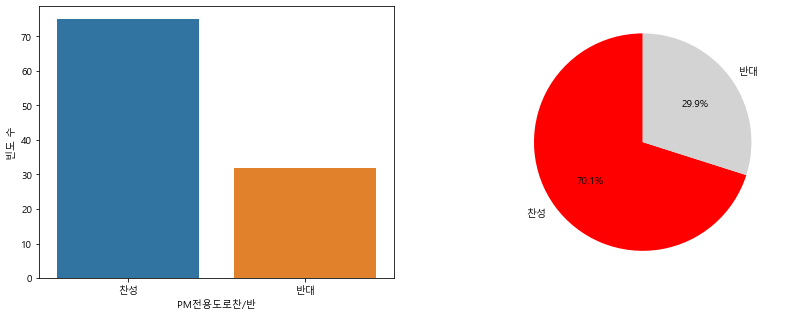

In [112]:
fig = plt.figure(figsize = (14,5))
ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(x= 찬반.index, y = '빈도 수', data=찬반)

ax2 = fig.add_subplot(1,2,2)
ax2 = plt.pie(찬반['비율'], labels = 찬반.index,
              autopct = '%1.1f%%', textprops = {'fontsize': 10}, colors = colors,
              shadow = False, startangle = 90)

* 응답자 중 70.1%는 PM전용도로의 필요성에 대해 찬성한다고 응답하였음

#### 4-2. 4-1번에서 체크한 의견의 이유를 적어주십시오.

In [113]:
df_이용자.columns

Index(['Unnamed: 0', '작성일시', '성별', '연령', '면허소지여부', '면허취득기간', '무면허이용',
       'PM실제이용기간', 'PM얼마나자주', '평균주행시간', 'PM이용목적', 'PM사고', 'PM사고횟수', 'PM사고원인',
       'PM사고위치', 'PM아차사고', 'PM아차사고횟수', 'PM아차사고원인', 'PM아차사고위치', 'PM주이용도로',
       'PM주이용도로_이유', 'PM주이용도로_반대이유', 'PM개선사항', 'PM전용도로찬/반', '전용도로찬/반_이유',
       '전용도로위치', '전용도로위치_이유', '추가의견', '빈도 수', 'PM사고경험'],
      dtype='object')

In [114]:
전용도로찬성 = df_이용자.loc[df_이용자['PM전용도로찬/반'] == '찬성']['전용도로찬/반_이유']
전용도로반대 = df_이용자.loc[df_이용자['PM전용도로찬/반'] == '반대']['전용도로찬/반_이유']

C:\Users\user\anaconda3\lib\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


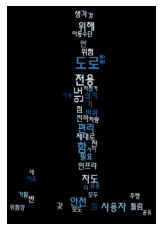

In [115]:
# 전용도로에 찬성한다 이유 시각화
text = 전용도로찬성
text = str(text)
text =''.join(text)
name = "전용도로찬성"
colormap = "Blues"
twitter = Twitter()
        
twitter.add_dictionary('자전거전용도로', 'Noun')
twitter.add_dictionary('PM전용도로', 'Noun')
twitter.add_dictionary('이동수단', 'Noun')
twitter.add_dictionary('필요', 'Noun')
    
text_file = twitter.nouns(text)
text_file = pd.Series(text_file).value_counts()

stop_word = ["굳이", "같다", "함","것", "가", ".","이", "이용","생각", "을","다", "에","한", "와","도로","인도",
             "있으므로", "로운", "가필",'에서도',"에서","하고","에게", "으로","에서","위해","하지"]
    #사용하지 않을 단어 또는 문장 추가
# line = [i for i in text_file if i not in stop_word]

# tags = Counter(line).most_common()
# print(tags)


wc = WordCloud(font_path='C:/Windows/Fonts/HMFMMUEX.TTC',background_color="Black",colormap = colormap,
                  width=3000, height=2000, mask = 이용자_mask)
cloud = wc.generate_from_frequencies(dict(text_file))

plt.imshow(cloud) 
plt.axis('off')
plt.show()
cloud.to_file(f'C:/Users/user/Desktop/워드클라우드/PM이용자/{name}_{colormap}.jpg')

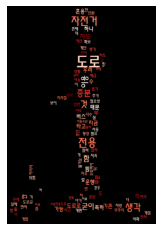

In [116]:
# 전용도로에 반대한다 이유 시각화
text = 전용도로반대
text = str(text)
text =''.join(text)
name = "전용도로반대"
colormap = "Reds"
twitter = Twitter()
        
twitter.add_dictionary('자전거전용도로', 'Noun')
twitter.add_dictionary('PM전용도로', 'Noun')
twitter.add_dictionary('이동수단', 'Noun')
twitter.add_dictionary('필요', 'Noun')
    
text_file = twitter.nouns(text)
text_file = pd.Series(text_file).value_counts()

stop_word = ["굳이", "같다", "함","것", "가", ".","이", "이용","생각", "을","다", "에","한", "와","도로","인도",
             "있으므로", "로운", "가필",'에서도',"에서","하고","에게", "으로","에서","위해","하지"]
    #사용하지 않을 단어 또는 문장 추가
# line = [i for i in text_file if i not in stop_word]

# tags = Counter(line).most_common()
# print(tags)


wc = WordCloud(font_path='C:/Windows/Fonts/HMFMMUEX.TTC',background_color="Black",colormap = colormap,
                  width=3000, height=2000, mask = 이용자_mask)
cloud = wc.generate_from_frequencies(dict(text_file))

plt.imshow(cloud) 
plt.axis('off')
plt.show()
cloud.to_file(f'C:/Users/user/Desktop/워드클라우드/PM이용자/{name}_{colormap}.jpg')

#### 4-3. PM 전용도로를 도로 중 어느 위치에 설치하는 것이 합리적이라고 생각하십니까?

In [117]:
도로위치 = pd.DataFrame(df_이용자.groupby('전용도로위치')['빈도 수'].sum())
도로위치['비율'] = 도로위치['빈도 수'] / sum(도로위치['빈도 수']) * 100
도로위치 = 도로위치.sort_values(by='빈도 수', ascending = False)

In [118]:
colors = ['red', 'red', 'lightgrey', 'lightgrey']

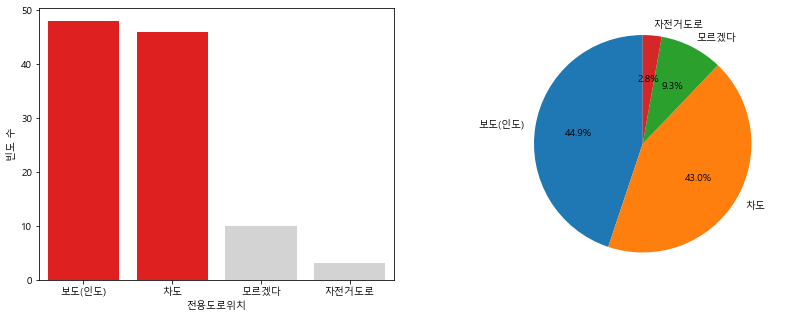

In [119]:
fig = plt.figure(figsize = (14,5))

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(x= 도로위치.index, y = '빈도 수', data=도로위치, palette = colors)

ax2 = fig.add_subplot(1,2,2)
ax2 = plt.pie(도로위치['비율'], labels = 도로위치.index,
              autopct = '%1.1f%%', textprops = {'fontsize': 10},
              shadow = False, startangle = 90)

* 응답자 중 44.9% 보도에, 43.0% 차도에 전용도로를 설치해야 한다고 응답하였음.

#### 4-4. 4-3번에서 체크한 의견에 대한 이유를 적어주십시오.

In [120]:
위치보도 = df_이용자.loc[df_이용자['전용도로위치'] == '보도(인도)']['전용도로위치_이유']
위치차도 = df_이용자.loc[df_이용자['전용도로위치'] == '차도']['전용도로위치_이유']

In [146]:
text = 위치보도
text = str(text)
text =''.join(text)
text

'2                               차도는 사고가 날 위험이 더 높을 것 같다.\n4                                    자전거도로처럼 생기면 좋을 것 같음\n5                         자전거 전용도로랑 같이 이용하는 방안이 현실적일듯합니다\n6                                              질문이 너무 많아\n7                                         안전에 대한 이유에서이다.\n8                                           임도에서 맘껏달리고싶움\n10                                  보도에 설치해야 차와 거리 유지 가능\n11                                                  세금절약\n12                         차도를 희생하면서까지 PM이용자가 많지 않다고 생각함\n13                     차도로 다니면 안전에 대한 보장이 어려울 수 있을 것 같다 \n14                                                    안점\n18                                         차도는 위험할것 같습니다\n21                                   차도와 가까우면 위험성이 커지므로.\n22                                                    위험\n27     서울의 복잡한 차도에서 pm을 이용하기에는 어려움이 있다고 생각, 현재 차도에 있는...\n29                            차도는 이미 많은 이동수단으로 포화상태라고 생각\n34                                       차도를 줄이기엔 좁아지기때문\n36           

C:\Users\user\anaconda3\lib\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


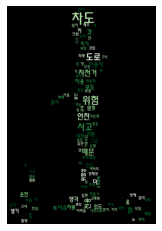

In [121]:
# 보도에 설치해야한다 이유 시각화
text = 위치보도
text = str(text)
text =''.join(text)
name = "위치보도"
colormap = "Greens"
twitter = Twitter()
        
twitter.add_dictionary('자전거전용도로', 'Noun')
twitter.add_dictionary('PM전용도로', 'Noun')
twitter.add_dictionary('이동수단', 'Noun')
twitter.add_dictionary('필요', 'Noun')
    
text_file = twitter.nouns(text)
text_file = pd.Series(text_file).value_counts()

stop_word = ["굳이", "같다", "함","것", "가", ".","이", "이용","생각", "을","다", "에","한", "와","도로","인도",
             "있으므로", "로운", "가필",'에서도',"에서","하고","에게", "으로","에서","위해","하지"]
    #사용하지 않을 단어 또는 문장 추가
# line = [i for i in text_file if i not in stop_word]

# tags = Counter(line).most_common()
# print(tags)


wc = WordCloud(font_path='C:/Windows/Fonts/HMFMMUEX.TTC',background_color="Black",colormap = colormap,
                  width=3000, height=2000, mask = 이용자_mask)
cloud = wc.generate_from_frequencies(dict(text_file))

plt.imshow(cloud) 
plt.axis('off')
plt.show()
cloud.to_file(f'C:/Users/user/Desktop/워드클라우드/PM이용자/{name}_{colormap}.jpg')

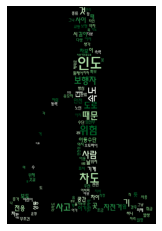

In [122]:
# 차도에 설치해야한다 이유 시각화
text = 위치차도
text = str(text)
text =''.join(text)
name = "위치차도"
colormap = "Greens"
twitter = Twitter()
        
twitter.add_dictionary('자전거전용도로', 'Noun')
twitter.add_dictionary('PM전용도로', 'Noun')
twitter.add_dictionary('이동수단', 'Noun')
twitter.add_dictionary('필요', 'Noun')
    
text_file = twitter.nouns(text)
text_file = pd.Series(text_file).value_counts()

stop_word = ["굳이", "같다", "함","것", "가", ".","이", "이용","생각", "을","다", "에","한", "와","도로","인도",
             "있으므로", "로운", "가필",'에서도',"에서","하고","에게", "으로","에서","위해","하지"]
    #사용하지 않을 단어 또는 문장 추가
# line = [i for i in text_file if i not in stop_word]

# tags = Counter(line).most_common()
# print(tags)


wc = WordCloud(font_path='C:/Windows/Fonts/HMFMMUEX.TTC',background_color="Black",colormap = colormap,
                  width=3000, height=2000, mask = 이용자_mask)
cloud = wc.generate_from_frequencies(dict(text_file))

plt.imshow(cloud) 
plt.axis('off')
plt.show()
cloud.to_file(f'C:/Users/user/Desktop/워드클라우드/PM이용자/{name}_{colormap}.jpg')

In [145]:
text = 위치차도
text = str(text)
text =''.join(text)
text

'0                                           인도에는 자리가 없을듯\n1                                       인도에는 만들공간이 없을거같다\n3                                        차도쪽이 그나마 나아보입니다\n9                                                 인도는 좁다\n15                                       어차피 차 종류로 분류하니까\n16                                     차도와 인도사이 자전거 전용도로\n19     차도 가장자리에! 보도에 다니기엔 너무 빠르고 위험, 차도에 다니기엔 조금 느리니 ...\n23           사람이 걸어다니는 곳에서의 pm이용은 빠른 속력으로 인해 사고 위험이 증가할듯\n24                                    동력을 사용한 이동수단이기 때문에\n25                                                    상동\n26                              보행자보다 훨씬 빠른 속도로 다니기 때문에 \n28                                      차도 옆 갓길이 좋다생각합니다\n30                               자전거 도로와 같이 취급되면 좋을것 같아서\n31                속도가 30km가 넘어가는 기계는 차도로 운행하는 것이 맞다고 판단함\n32     속도 차이 때문에 차도 또한 위험하지만 보행자들이 자전거전용도로로 걸어다녀서 제대로...\n33                                 보도는 사람이 다니기도 좁은 곳이 많음\n35                            연석과 차도 사이에 새롭게 만드는것도 좋을것같다\n44           

In [123]:
list(df_이용자['추가의견'])

['.',
 '전동킥보드 두명 타는거 제지하는거랑, 아무데나 주차하는건 문제라고 생각함..',
 nan,
 nan,
 '정차하는 규정 필요.인도중앙에 둬 노약자 부상 우려있음',
 '운전자 입장에서 보았을때 엄청난 위험요소 입니다. 특히 도로에서 역주행으로 달리는 PM... 이를 방지하기 위한 대책이 있으면 좋겠어요',
 '없어요',
 nan,
 nan,
 nan,
 '없음',
 nan,
 '차도는 pm이 위험에 처하고 인도는\n사람이 위험에 처하니 \n어디에서 타도 시선이 좋지 않은 것 같다.\nPM 전용 면허 및 안전교육을 하는건 어떨까 ?',
 nan,
 nan,
 nan,
 nan,
 '만드느라 고생하셧어요',
 '위험요소 대해서 좀 더 안내하고\n더 확충 되었으면 좋겠습니다 ㅎㅎ 이용할수 있는 PM이',
 nan,
 '특정구역 내에서만 사용허가',
 '안전성을 위한 여러방안 모색 필요. ',
 '아자아자 화이자',
 nan,
 nan,
 '보험과 면허제도를 강화하여 도로에서 주행하는데 있어 최소한의 요건을 만족해야 한다고 생각합니다.',
 nan,
 nan,
 nan,
 '없음.',
 '헬멧도 같이 묶어서 사용가능했으면 좋겠다. 보통은 갑자기 타는 일이 많은데 헬멧을 매일 들고다닐수는 없으니.',
 '없습니다. 이현진 바보',
 '진짜 제발 이용자 의식 뿐만 아니라 보행자의 인식도 개선되었으면 좋겠습니다. 실제로 보도와 자전거 전용도로가 구분되어있으면 보행자는 자전거 도로에서의 보행이 금지됩니다. 하지만 실제로 이를 알고 지키는 사람은 거의 없고, 전용도로에서 보행자와 사고 발생시 100% pm 이용자 과실입니다. 저는 법 다 지키고 무조건 전용도로로만 다니는데, 하루는 전용도로 위 보행자 피하다가 혼자 넘어졌습니다. 그래서 다음 날 약 10분간의 이용 시간동안 전용도로에 있는 사람 약 15명에게 비키라는 벨을 최소 두번씩 울렸으나 실제로 비킨 사람은 단 한 명뿐이었습니다. 정말 보행자의 인식 개선 또한 반드시 함께 해결되어야 하는 문제입니다.',
 

### 항목별 찬성반대 교차분석
* PM 이용 빈도에 따른 의견 차이 보여주기
* 밖에 외출하는 빈도, 이용빈도 등 에 따른 의견 차이
    1. PM도로 - 전체(찬/반) - 4-2. 왜 찬성 왜 반대? 워드클라우드
    2. 서술형 문항 4-2, 4-4, 5 - 기준을 나눠서. 이용횟수별로 나눠서 워드 클라우드.


* 비교항목: 사고(아차/실제) , 전용도로찬반, 설치위치, 이유(워드 클라우드), 개선사항(객관식 문항) 

1. 성별 
- 남자 표본수가 월등히 많긴 함
- 분석: PM이용자(남/여) , 보행자(남/여), 차량운전자(남/여) 로 분류

2. 연령 
- 20대가 월등히 많음, 타 연령대 표본 부족하므로 전체 합쳐서 비교
- 사고(아차/실제) , 전용도로찬반, 설치위치, 이유 (워드클라우드), 개선사항(객관식 문항)
-- PM이용자 20대가 많이 나온건 합당한 결과. 
전체 합친 결과 연령대별 찬반 시각화 했을 때 30대 이상 연령층에서 운전자 한정의 결과가 보인다면 좋을 듯
(한계: 처음 설문항목을 PM이용자/보행자/운전자로 범주화 했기에, 운전자의 입장을 더 생각하여 설문에 참여했을 수도 있다는 점)
- 20~30대가 설문 인원 중 가장 많음(PM이용자: 115 / 보행자: 50 / 운전자: 38)
-- 20~30대에 대하여 PM이용자/보행자/운전자 비교 진행

3. 실제 이용(언제부터 이용했는지) : 오래동안 탔던 사람 / 적게 탄 사람 간 의견 차이 존재할 수 있으므로 비교해본다.

4. 얼마나 자주 이용하는지 : 주 1회 미만이 85건으로 압도적으로 많음. 주 1회 미만 vs 주 1회 이상(22건) 으로 비교

5. 평균 주행 시간: 5분 단위, 10분 단위... 로 쪼개보고 각 단위별 응답건수가 비슷하게 나오는 것들로 분석 실시

6. 목적별 : 범주화 되어있는 대로 분석 실시

* 3~5는 운전자/보행자에 대해서도 동일하게 적용하여 분석 진행
 

### 교차분석(사고, 찬반, 설치위치)
1. 성별
2. 연령
3. 실제이용기간
4. 얼마나 자주
5. 평균주행시간
6. 목적별

#### pm 이용자 성별-사고 교차분석

In [124]:
# 남자, 여자 중 사고 난 비율
pm남자 = df_이용자.loc[df_이용자['성별'] == '남자']
pm여자 = df_이용자.loc[df_이용자['성별'] == '여자']

pm사고_남자 = pd.DataFrame(pm남자.groupby('PM사고경험')['빈도 수'].count())
pm사고_남자['비율'] = pm사고_남자['빈도 수'] / sum(pm사고_남자['빈도 수']) * 100

pm사고_여자 = pd.DataFrame(pm여자.groupby('PM사고경험')['빈도 수'].count())
pm사고_여자['비율'] = pm사고_여자['빈도 수'] / sum(pm사고_여자['빈도 수']) * 100 

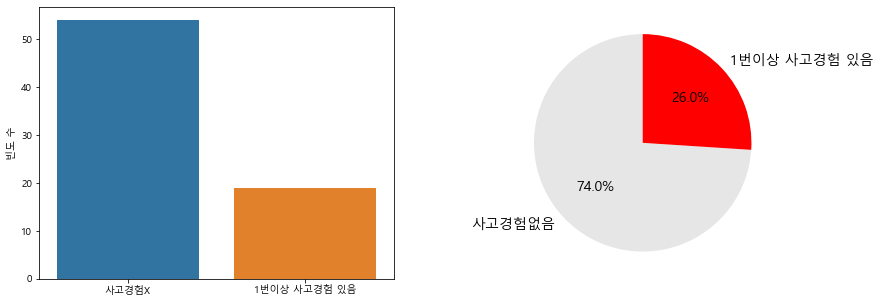

In [125]:
fig = plt.figure(figsize=(14,5))

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(x=['사고경험X', '1번이상 사고경험 있음'], y = '빈도 수', data=pm사고_남자)

ax2 = fig.add_subplot(1,2,2)
ax2 = plt.pie(pm사고_남자['비율'],labels =['사고경험없음', '1번이상 사고경험 있음'],
        autopct="%1.1f%%", colors=[(0.9,0.9,0.9), 'red'], textprops = {'fontsize': 14},
        shadow = False, startangle = 90)

* 남자 중 26%는 1번 이상 사고를 경험한 적이 있음

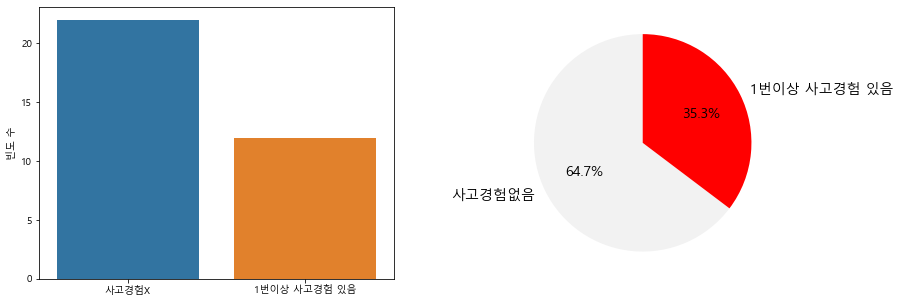

In [126]:
fig = plt.figure(figsize=(14,5))

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(x=['사고경험X', '1번이상 사고경험 있음'], y = '빈도 수', data=pm사고_여자)

ax2 = fig.add_subplot(1,2,2)
ax2 = plt.pie(pm사고_여자['비율'],labels =['사고경험없음', '1번이상 사고경험 있음'],
              autopct="%1.1f%%", colors=[(0.95,0.95,0.95), 'red'], textprops = {'fontsize': 14},
              shadow = False, startangle = 90)
plt.show()

* 여자 중 35.3%는 1번 이상의 사고 경험이 있다고 응답하였음.

#### pm 이용자 성별 - PM전용도로찬/반 교차분석

In [127]:
# 성별 전용도로 찬성/반대
df_이용자_남자 = df_이용자.loc[df_이용자['성별'] == '남자']
df_이용자_여자 = df_이용자.loc[df_이용자['성별'] == '여자']

In [128]:
남자찬반 = pd.DataFrame(df_이용자_남자.groupby('PM전용도로찬/반')['빈도 수'].count()).sort_values(by='빈도 수', ascending=False)
남자찬반['비율'] = 남자찬반['빈도 수'] / sum(남자찬반['빈도 수']) * 100
남자찬반

,빈도 수,비율
PM전용도로찬/반,,
찬성,48,65.753425
반대,25,34.246575


In [129]:
여자찬반 = pd.DataFrame(df_이용자_여자.groupby('PM전용도로찬/반')['빈도 수'].count()).sort_values(by='빈도 수', ascending=False)
여자찬반['비율'] = 여자찬반['빈도 수'] / sum(여자찬반['빈도 수']) * 100
여자찬반

,빈도 수,비율
PM전용도로찬/반,,
찬성,27,79.411765
반대,7,20.588235


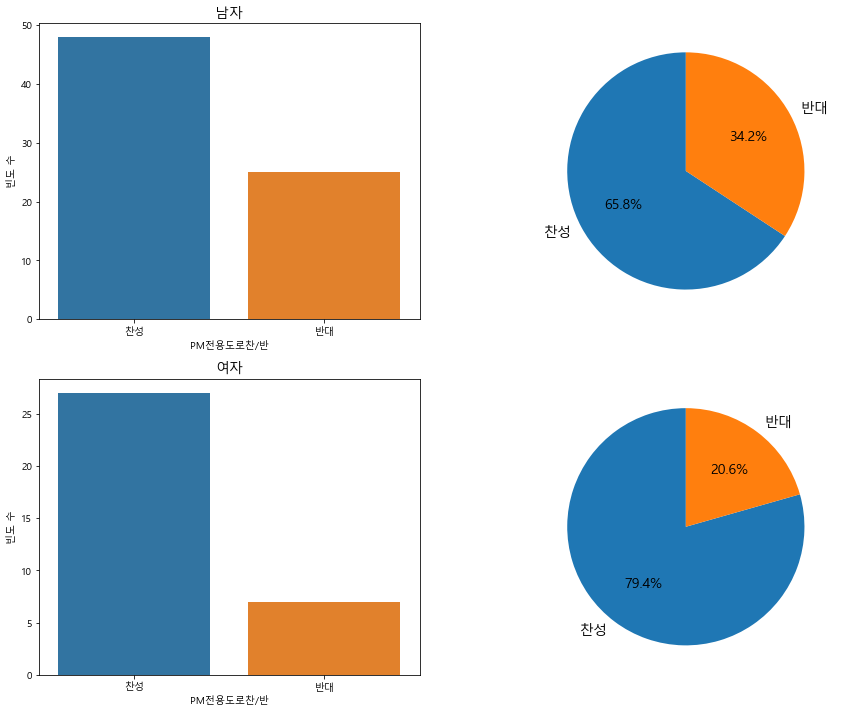

In [130]:
fig = plt.figure(figsize = (15,12))

ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x=남자찬반.index, y = '빈도 수', data=남자찬반)
plt.title('남자', fontsize = 14)

ax2 = fig.add_subplot(2,2,2)
ax2 = plt.pie(남자찬반['비율'], labels = 남자찬반.index,
              autopct = '%1.1f%%', textprops = {'fontsize': 14},
              shadow = False, startangle = 90)


ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x=여자찬반.index, y = '빈도 수', data=여자찬반)
plt.title('여자', fontsize = 14)

ax4 = fig.add_subplot(2,2,4)
ax4 = plt.pie(여자찬반['비율'], labels = 여자찬반.index,
              autopct = '%1.1f%%', textprops = {'fontsize': 14},
              shadow = False, startangle = 90)

plt.show()

* 남자 응답자 중 65.8%는 PM전용도로 설치에 대하여 찬성한다고 응답하였음.
* 여자 응답자 중 79.4%는 PM전용도로 설치에 대하여 찬성한다고 응답하였음.

#### pm 이용자 성별 - PM전용도로 설치위치 교차분석

In [131]:
남자_전용도로위치 = pd.DataFrame(df_이용자_남자.groupby('전용도로위치')['빈도 수'].count()).sort_values(by='빈도 수', ascending = False)
남자_전용도로위치['비율'] = round(남자_전용도로위치['빈도 수'] / sum(남자_전용도로위치['빈도 수']) * 100, ndigits=1)

여자_전용도로위치 = pd.DataFrame(df_이용자_여자.groupby('전용도로위치')['빈도 수'].count()).sort_values(by='빈도 수', ascending = False)
여자_전용도로위치['비율'] = round(여자_전용도로위치['빈도 수'] / sum(여자_전용도로위치['빈도 수']) * 100, ndigits=1)

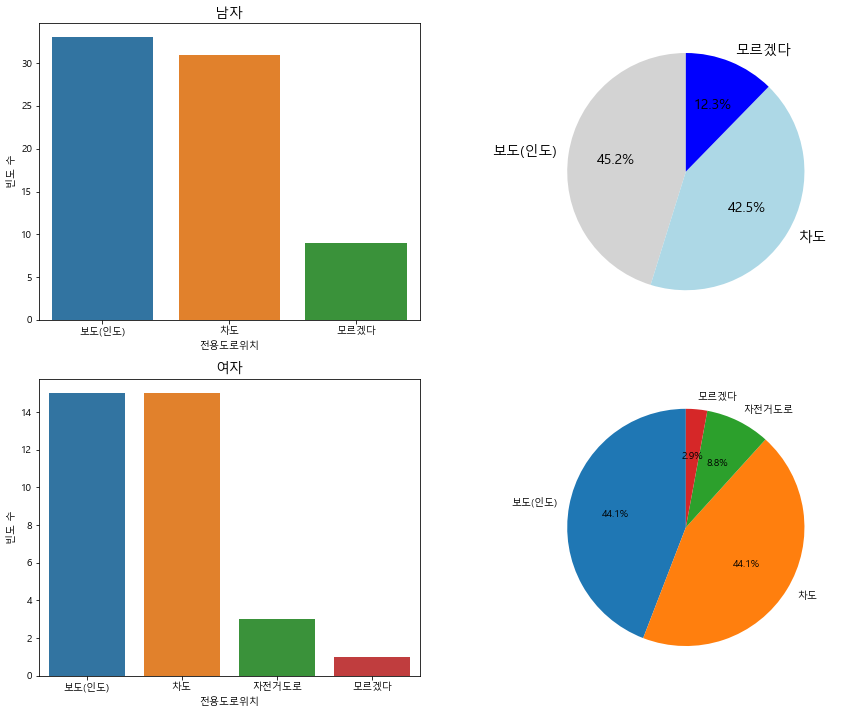

In [132]:
fig = plt.figure(figsize = (15,12))

ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x=남자_전용도로위치.index, y = '빈도 수', data=남자_전용도로위치)
plt.title('남자', fontsize = 14)

ax2 = fig.add_subplot(2,2,2)
ax2 = plt.pie(남자_전용도로위치['비율'], labels = 남자_전용도로위치.index,
              autopct = '%1.1f%%', textprops = {'fontsize': 14},colors = ['lightgrey', 'lightblue', 'blue'],
              shadow = False, startangle = 90)


ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x=여자_전용도로위치.index, y = '빈도 수', data=여자_전용도로위치)
plt.title('여자', fontsize = 14)

ax4 = fig.add_subplot(2,2,4)
ax4 = plt.pie(여자_전용도로위치['비율'], labels = 여자_전용도로위치.index,
              autopct = '%1.1f%%', textprops = {'fontsize': 10},
              shadow = False, startangle = 90)

plt.show()

* 남자 응답자 중 45.2% 보도에, 42.5% 차도에 PM전용도로를 설치해야 한다고 응답하였음.
* 여자 응답자 중 44.1% 보도에, 44.1% 차도에 PM전용도로를 설치해야 한다고 응답하였음.

#### pm 이용자 이용기간별 - 사고 교차분석

In [133]:
df_이용자.PM실제이용기간.unique()

array(['6개월 이상 ~ 1년 미만', '1개월 이상 ~ 6개월 미만', '1개월 미만', '1년 이상 ~ 3년 미만'],
      dtype=object)

In [134]:
pm1개월 = df_이용자.loc[df_이용자['PM실제이용기간'] == '1개월 미만']
pm6개월 = df_이용자.loc[df_이용자['PM실제이용기간'] == '1개월 이상 ~ 6개월 미만']
pm1년 = df_이용자.loc[df_이용자['PM실제이용기간'] == '6개월 이상 ~ 1년 미만']
pm1년이상 = df_이용자.loc[df_이용자['PM실제이용기간'] == '1년 이상 ~ 3년 미만']

In [135]:
pm1개월.columns

Index(['Unnamed: 0', '작성일시', '성별', '연령', '면허소지여부', '면허취득기간', '무면허이용',
       'PM실제이용기간', 'PM얼마나자주', '평균주행시간', 'PM이용목적', 'PM사고', 'PM사고횟수', 'PM사고원인',
       'PM사고위치', 'PM아차사고', 'PM아차사고횟수', 'PM아차사고원인', 'PM아차사고위치', 'PM주이용도로',
       'PM주이용도로_이유', 'PM주이용도로_반대이유', 'PM개선사항', 'PM전용도로찬/반', '전용도로찬/반_이유',
       '전용도로위치', '전용도로위치_이유', '추가의견', '빈도 수', 'PM사고경험'],
      dtype='object')

In [136]:
PM실제_사고 = pd.DataFrame(df_이용자.groupby('PM실제이용기간')['PM사고경험'].sum()).sort_values(by='PM사고경험', ascending = False)
PM실제_사고['비율'] = PM실제_사고['PM사고경험'] / sum(PM실제_사고['PM사고경험']) * 100
PM실제_사고

,PM사고경험,비율
PM실제이용기간,,
1년 이상 ~ 3년 미만,10,32.258065
1개월 미만,9,29.032258
6개월 이상 ~ 1년 미만,9,29.032258
1개월 이상 ~ 6개월 미만,3,9.677419


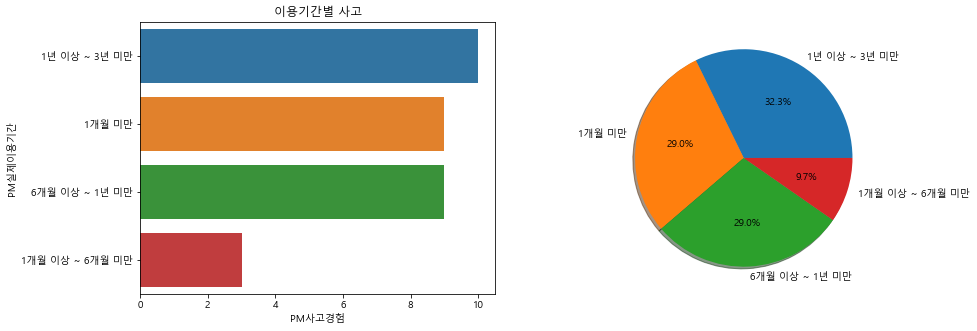

In [137]:
fig = plt.figure(figsize = (14,5))
ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(x = 'PM사고경험', y = PM실제_사고.index, data=PM실제_사고)
ax1.set_title('이용기간별 사고')

ax2 = fig.add_subplot(1,2,2)
ax2 = plt.pie(PM실제_사고['비율'], labels = PM실제_사고.index,
              autopct="%1.1f%%", textprops = {'fontsize': 10},
              shadow = True)

In [138]:
pm1개월사고 = pd.DataFrame(pm1개월.groupby('PM사고경험')['빈도 수'].sum())
pm1개월사고['비율'] = pm1개월사고['빈도 수'] / sum(pm1개월사고['빈도 수']) * 100 

pm6개월사고 = pd.DataFrame(pm6개월.groupby('PM사고경험')['빈도 수'].sum())
pm6개월사고['비율'] = pm6개월사고['빈도 수'] / sum(pm6개월사고['빈도 수']) * 100 

pm1년사고 = pd.DataFrame(pm1년.groupby('PM사고경험')['빈도 수'].sum())
pm1년사고['비율'] = pm1년사고['빈도 수'] / sum(pm1년사고['빈도 수']) * 100 

pm1년이상사고 = pd.DataFrame(pm1년이상.groupby('PM사고경험')['빈도 수'].sum())
pm1년이상사고['비율'] = pm1년이상사고['빈도 수'] / sum(pm1년이상사고['빈도 수']) * 100 

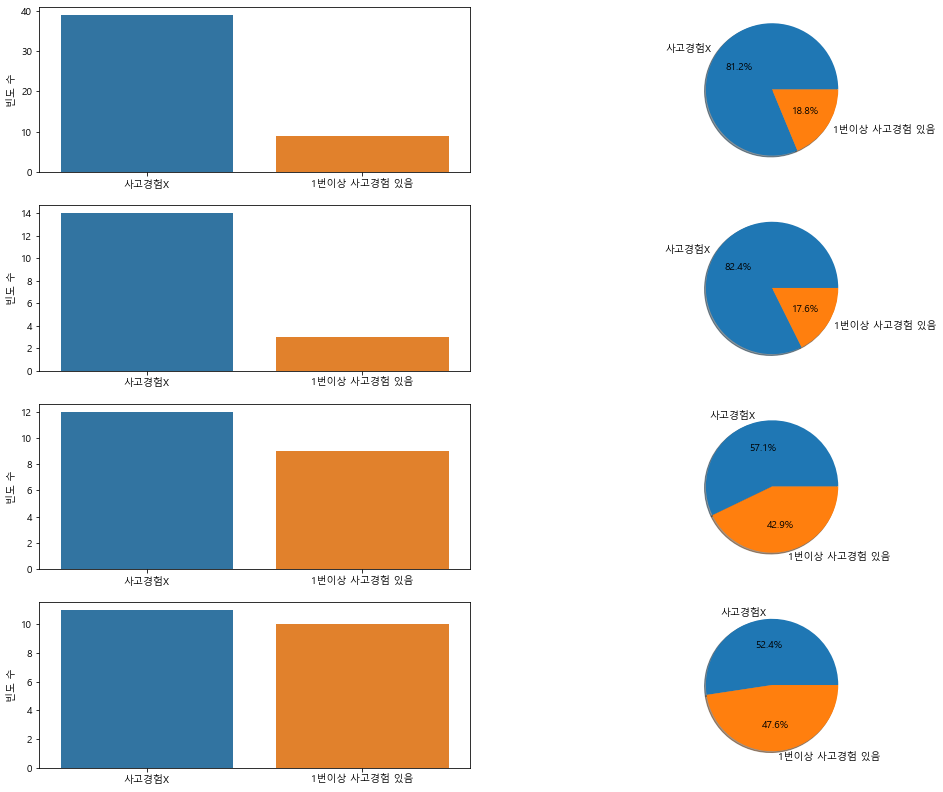

In [139]:
fig = plt.figure(figsize = (17,14))
ax1 = fig.add_subplot(4,2,1)
ax1 = sns.barplot(x = ['사고경험X', '1번이상 사고경험 있음'], y = '빈도 수', data = pm1개월사고)

ax2 = fig.add_subplot(4,2,2)
ax2 = plt.pie(pm1개월사고['비율'], labels =['사고경험X', '1번이상 사고경험 있음'],
              autopct="%1.1f%%", textprops = {'fontsize': 10},
              shadow = True)

ax3 = fig.add_subplot(4,2,3)
ax3 = sns.barplot(x = ['사고경험X', '1번이상 사고경험 있음'], y = '빈도 수', data = pm6개월사고)


ax4 = fig.add_subplot(4,2,4)
ax4 = plt.pie(pm6개월사고['비율'], labels = ['사고경험X', '1번이상 사고경험 있음'],
              autopct="%1.1f%%", textprops = {'fontsize': 10},
              shadow = True)

ax5 = fig.add_subplot(4,2,5)
ax5 = sns.barplot(x = ['사고경험X', '1번이상 사고경험 있음'], y = '빈도 수', data = pm1년사고)


ax6 = fig.add_subplot(4,2,6)
ax6 = plt.pie(pm1년사고['비율'], labels = ['사고경험X', '1번이상 사고경험 있음'],
              autopct="%1.1f%%", textprops = {'fontsize': 10},
              shadow = True)

ax7 = fig.add_subplot(4,2,7)
ax7 = sns.barplot(x = ['사고경험X', '1번이상 사고경험 있음'], y = '빈도 수', data = pm1년이상사고)
              
ax8 = fig.add_subplot(4,2,8)
ax8 = plt.pie(pm1년이상사고['비율'], labels = ['사고경험X', '1번이상 사고경험 있음'],
              autopct="%1.1f%%", textprops = {'fontsize': 10},
              shadow = True)

#### pm 이용자 이용기간별 - 전용도로찬/반 교차분석

In [140]:
pm1개월찬반 = pd.DataFrame(pm1개월.groupby('PM전용도로찬/반')['빈도 수'].count()).sort_values(by='빈도 수', ascending=False)
pm1개월찬반['비율'] = pm1개월찬반['빈도 수'] / sum(pm1개월찬반['빈도 수']) * 100

pm6개월찬반 = pd.DataFrame(pm6개월.groupby('PM전용도로찬/반')['빈도 수'].count()).sort_values(by='빈도 수', ascending=False)
pm6개월찬반['비율'] = pm6개월찬반['빈도 수'] / sum(pm6개월찬반['빈도 수']) * 100

pm1년찬반 = pd.DataFrame(pm1년.groupby('PM전용도로찬/반')['빈도 수'].count()).sort_values(by='빈도 수', ascending=False)
pm1년찬반['비율'] = pm1년찬반['빈도 수'] / sum(pm1년찬반['빈도 수']) * 100

pm1년이상찬반 = pd.DataFrame(pm1년이상.groupby('PM전용도로찬/반')['빈도 수'].count()).sort_values(by='빈도 수', ascending=False)
pm1년이상찬반['비율'] = pm1년이상찬반['빈도 수'] / sum(pm1년이상찬반['빈도 수']) * 100

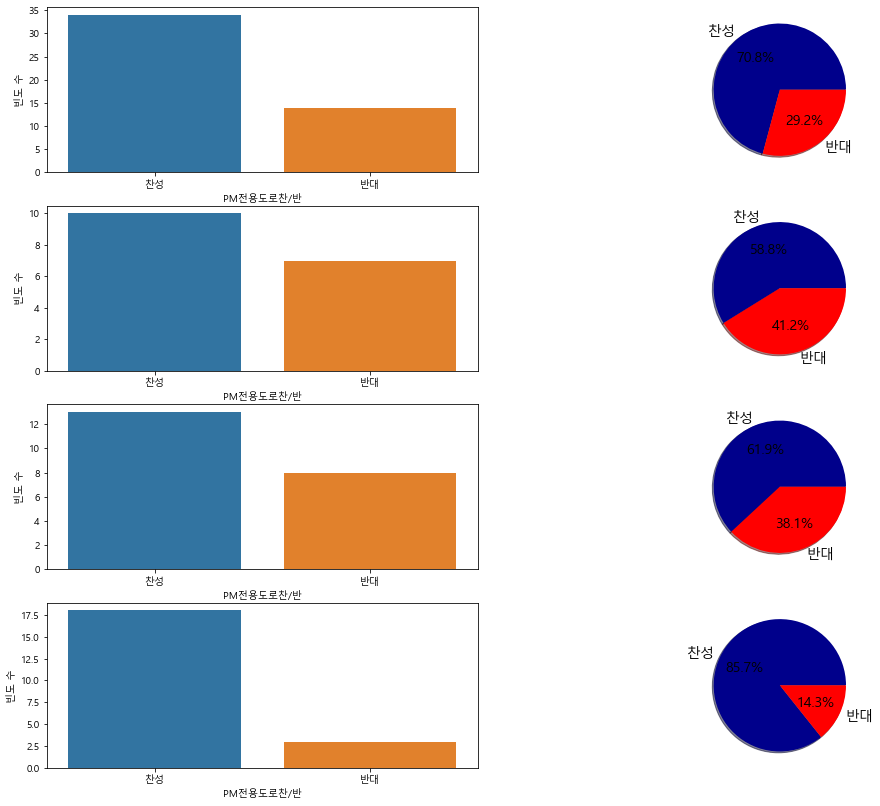

In [141]:
fig = plt.figure(figsize=(17,14))

ax1 = fig.add_subplot(4,2,1)
ax1 = sns.barplot(x = pm1개월찬반.index, y = '빈도 수', data = pm1개월찬반)

ax2 = fig.add_subplot(4,2,2)
ax2 = plt.pie(pm1개월찬반['비율'], labels = pm1개월찬반.index,
              autopct="%1.1f%%", textprops = {'fontsize': 14},
              shadow = True, colors = ['darkblue','red'])

ax3 = fig.add_subplot(4,2,3)
ax3 = sns.barplot(x = pm6개월찬반.index, y = '빈도 수', data = pm6개월찬반)

ax4 = fig.add_subplot(4,2,4)
ax4 = plt.pie(pm6개월찬반['비율'], labels = pm6개월찬반.index,
              autopct="%1.1f%%", textprops = {'fontsize': 14},
              shadow = True, colors = ['darkblue','red'])


ax5 = fig.add_subplot(4,2,5)
ax5 = sns.barplot(x = pm1년찬반.index, y = '빈도 수', data = pm1년찬반)

ax6 = fig.add_subplot(4,2,6)
ax6 = plt.pie(pm1년찬반['비율'], labels = pm1년찬반.index,
              autopct="%1.1f%%", textprops = {'fontsize': 14},
              shadow = True, colors = ['darkblue','red'])


ax7 = fig.add_subplot(4,2,7)
ax7 = sns.barplot(x = pm1년이상찬반.index, y = '빈도 수', data = pm1년이상찬반)

ax8 = fig.add_subplot(4,2,8)
ax8 = plt.pie(pm1년이상찬반['비율'], labels = pm1년이상찬반.index,
              autopct="%1.1f%%", textprops = {'fontsize': 14},
              shadow = True, colors = ['darkblue','red'])

#### pm 이용자 이용기간별 - PM전용도로 설치위치 교차분석

In [142]:
pm1개월위치 = pd.DataFrame(pm1개월.groupby('전용도로위치')['빈도 수'].count()).sort_values(by='빈도 수', ascending=False)
pm1개월위치['비율'] = pm1개월위치['빈도 수'] / sum(pm1개월위치['빈도 수']) * 100

pm6개월위치 = pd.DataFrame(pm6개월.groupby('전용도로위치')['빈도 수'].count()).sort_values(by='빈도 수', ascending=False)
pm6개월위치['비율'] = pm6개월위치['빈도 수'] / sum(pm6개월위치['빈도 수']) * 100

pm1년위치 = pd.DataFrame(pm1년.groupby('전용도로위치')['빈도 수'].count()).sort_values(by='빈도 수', ascending=False)
pm1년위치['비율'] = pm1년위치['빈도 수'] / sum(pm1년위치['빈도 수']) * 100

pm1년이상위치 = pd.DataFrame(pm1년이상.groupby('전용도로위치')['빈도 수'].count()).sort_values(by='빈도 수', ascending=False)
pm1년이상위치['비율'] = pm1년이상위치['빈도 수'] / sum(pm1년이상위치['빈도 수']) * 100

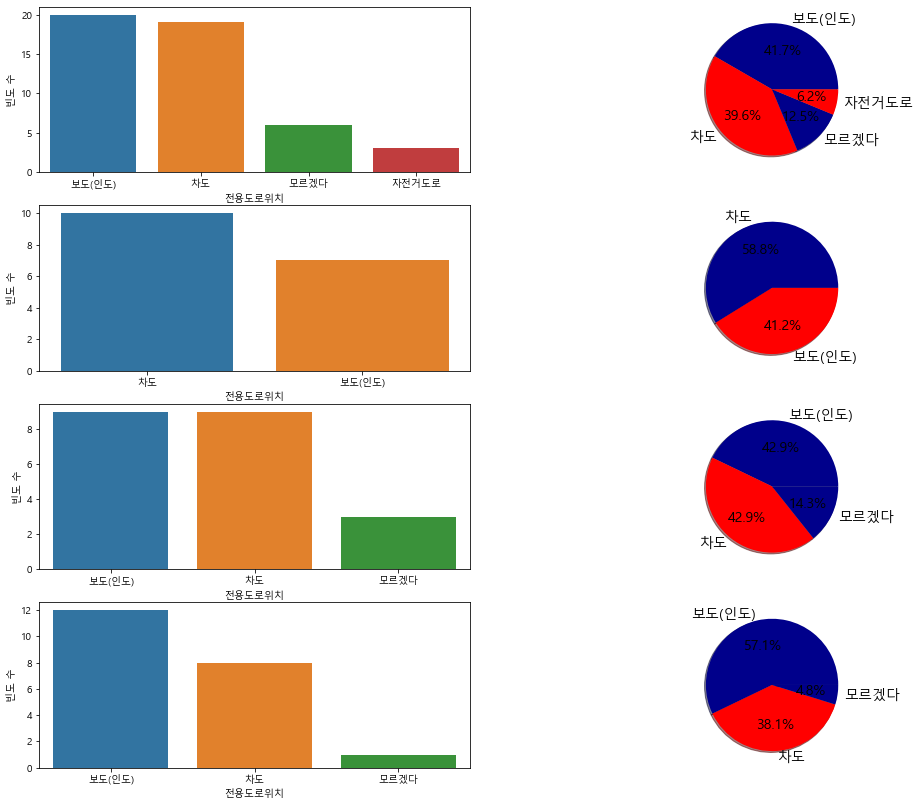

In [143]:
fig = plt.figure(figsize=(17,14))

ax1 = fig.add_subplot(4,2,1)
ax1 = sns.barplot(x = pm1개월위치.index, y = '빈도 수', data = pm1개월위치)

ax2 = fig.add_subplot(4,2,2)
ax2 = plt.pie(pm1개월위치['비율'], labels = pm1개월위치.index,
              autopct="%1.1f%%", textprops = {'fontsize': 14},
              shadow = True, colors = ['darkblue','red'])


ax1 = fig.add_subplot(4,2,3)
ax1 = sns.barplot(x = pm6개월위치.index, y = '빈도 수', data = pm6개월위치)

ax2 = fig.add_subplot(4,2,4)
ax2 = plt.pie(pm6개월위치['비율'], labels = pm6개월위치.index,
              autopct="%1.1f%%", textprops = {'fontsize': 14},
              shadow = True, colors = ['darkblue','red'])


ax1 = fig.add_subplot(4,2,5)
ax1 = sns.barplot(x = pm1년위치.index, y = '빈도 수', data = pm1년위치)

ax2 = fig.add_subplot(4,2,6)
ax2 = plt.pie(pm1년위치['비율'], labels = pm1년위치.index,
              autopct="%1.1f%%", textprops = {'fontsize': 14},
              shadow = True, colors = ['darkblue','red'])


ax1 = fig.add_subplot(4,2,7)
ax1 = sns.barplot(x = pm1년이상위치.index, y = '빈도 수', data = pm1년이상위치)

ax2 = fig.add_subplot(4,2,8)
ax2 = plt.pie(pm1년이상위치['비율'], labels = pm1년이상위치.index,
              autopct="%1.1f%%", textprops = {'fontsize': 14},
              shadow = True, colors = ['darkblue','red'])


####  pm 이용자 1주일 이용횟수 - 사고 교차분석

* 1주일 이용횟수의 값별 갯수 차이가 많이 나 주1회미만과 주1회이상으로 비교하였음

In [112]:
pm주1회미만 = df_이용자.loc[df_이용자['PM얼마나자주'] == '주 1회 미만']
pm주1회이상 = df_이용자.loc[(df_이용자['PM얼마나자주'] == '주 1 ~ 2회') |
                            (df_이용자['PM얼마나자주'] == '주 3 ~ 4회') |
                            (df_이용자['PM얼마나자주'] == '매일')]

In [113]:
pm주1회미만사고 = pd.DataFrame(pm주1회미만.groupby('PM사고경험')['빈도 수'].count())
pm주1회미만사고['비율'] = pm주1회미만사고['빈도 수'] / sum(pm주1회미만사고['빈도 수']) * 100 

pm주1회이상사고 = pd.DataFrame(pm주1회이상.groupby('PM사고경험')['빈도 수'].count())
pm주1회이상사고['비율'] = pm주1회이상사고['빈도 수'] / sum(pm주1회이상사고['빈도 수']) * 100 

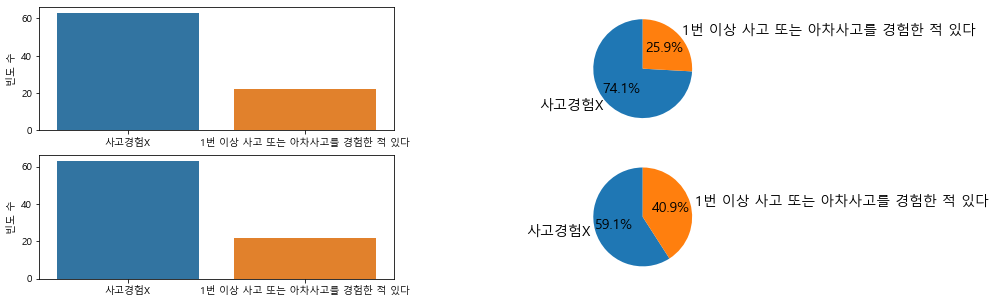

In [114]:
fig = plt.figure(figsize=(14,5))

ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x = ['사고경험X', '1번 이상 사고 또는 아차사고를 경험한 적 있다'], y = '빈도 수', data = pm주1회미만사고)

ax2 = fig.add_subplot(2,2,2)
ax2 = plt.pie(pm주1회미만사고['비율'], labels=['사고경험X', '1번 이상 사고 또는 아차사고를 경험한 적 있다'],
             autopct="%1.1f%%", textprops = {'fontsize': 14},startangle = 90)

ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x = ['사고경험X', '1번 이상 사고 또는 아차사고를 경험한 적 있다'], y = '빈도 수', data = pm주1회미만사고)

ax4 = fig.add_subplot(2,2,4)
ax4 = plt.pie(pm주1회이상사고['비율'], labels=['사고경험X', '1번 이상 사고 또는 아차사고를 경험한 적 있다'],
             autopct="%1.1f%%", textprops = {'fontsize': 14},startangle = 90)

* 주 1회미만으로 PM을 이용하는 사람들 중 25.9%는 1번이상 사고 또는 아차사고를 경험한 적이 있다고 응답하였음
* 주 1회이상으로 PM을 이용하는 사람들 중 40.9%가 1번이상 사고 또는 아차사고를 경험한 적이 있다고 응답하였음.

#### pm 이용자 1주일 이용횟수 - PM전용도로찬/반 교차분석

In [115]:
pm주1회미만찬반 = pd.DataFrame(pm주1회미만.groupby('PM전용도로찬/반')['빈도 수'].count())
pm주1회미만찬반['비율'] = pm주1회미만찬반['빈도 수'] / sum(pm주1회미만찬반['빈도 수']) * 100

pm주1회이상찬반 = pd.DataFrame(pm주1회이상.groupby('PM전용도로찬/반')['빈도 수'].count())
pm주1회이상찬반['비율'] = pm주1회이상찬반['빈도 수'] / sum(pm주1회이상찬반['빈도 수']) * 100

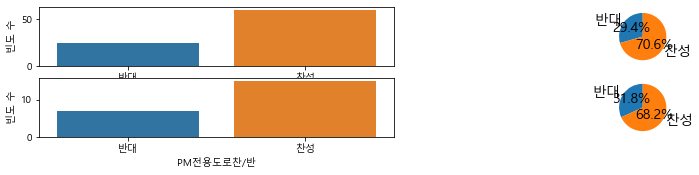

In [116]:
fig = plt.figure(figsize=(14,5))

ax1 = fig.add_subplot(4,2,1)
ax1 = sns.barplot(x = pm주1회미만찬반.index, y = '빈도 수', data = pm주1회미만찬반)

ax2 = fig.add_subplot(4,2,2)
ax2 = plt.pie(pm주1회미만찬반['비율'], labels= pm주1회미만찬반.index,
             autopct="%1.1f%%", textprops = {'fontsize': 14},startangle = 90)

ax3 = fig.add_subplot(4,2,3)
ax3 = sns.barplot(x = pm주1회이상찬반.index, y = '빈도 수', data = pm주1회이상찬반)

ax4 = fig.add_subplot(4,2,4)
ax4 = plt.pie(pm주1회이상찬반['비율'], labels= pm주1회이상찬반.index,
             autopct="%1.1f%%", textprops = {'fontsize': 14},startangle = 90)

* 주 1회 미만 이용자 중 70.6%는 PM전용도로가 필요하다고 응답하였음
* 주 1회 이상 이용자 중 68.2%는 PM전용도로가 필요하다고 응답하였음

#### pm 이용자 1주일 이용횟수 - PM전용도로 설치위치 교차분석

In [117]:
pm주1회미만위치 = pd.DataFrame(pm주1회미만.groupby('전용도로위치')['빈도 수'].count()).sort_values(by='빈도 수', ascending=False)
pm주1회미만위치['비율'] = pm주1회미만위치['빈도 수'] / sum(pm주1회미만위치['빈도 수']) * 100

pm주1회이상위치 = pd.DataFrame(pm주1회이상.groupby('전용도로위치')['빈도 수'].count()).sort_values(by='빈도 수', ascending=False)
pm주1회이상위치['비율'] = pm주1회이상위치['빈도 수'] / sum(pm주1회이상위치['빈도 수']) * 100

In [118]:
pm주1회이상위치

,빈도 수,비율
전용도로위치,,
차도,11,50.000000
보도(인도),9,40.909091
모르겠다,2,9.090909


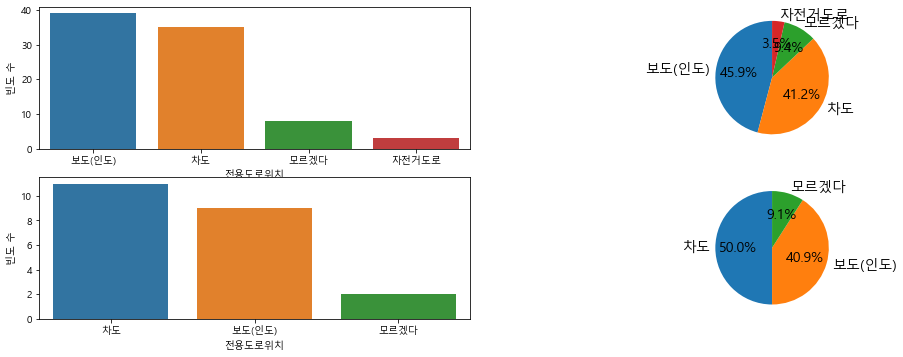

In [119]:
fig = plt.figure(figsize=(17,12))

ax1 = fig.add_subplot(4,2,1)
ax1 = sns.barplot(x = pm주1회미만위치.index, y = '빈도 수', data = pm주1회미만위치)

ax2 = fig.add_subplot(4,2,2)
ax2 = plt.pie(pm주1회미만위치['비율'], labels= pm주1회미만위치.index,
             autopct="%1.1f%%", textprops = {'fontsize': 14},startangle = 90)

ax3 = fig.add_subplot(4,2,3)
ax3 = sns.barplot(x = pm주1회이상위치.index, y = '빈도 수', data = pm주1회이상위치)

ax4 = fig.add_subplot(4,2,4)
ax4 = plt.pie(pm주1회이상위치['비율'], labels= pm주1회이상위치.index,
             autopct="%1.1f%%", textprops = {'fontsize': 14},startangle = 90)

* 주 1회미만 이용자들 중 전용도로 설치위치를 45.9%는 보도(인도)에, 41.2%는 차도에 해야한다고 응답하였음.
* 주 1회이상 이용자들 중 전용도로 설치위치를 78.0%는 보도(인도)에 해야한다고 응답하였음.

#### pm 이용자 주행시간별 - 사고 교차분석

* 10분 미만, 20분 미만 , 30분 미만, 30분 이상 

In [120]:
# 10분 미만, 20분 미만 , 30분 미만, 30분 이상 
pm평균10분미만 = df_이용자.loc[df_이용자['평균주행시간'] < 10]
pm평균20분미만 = df_이용자.loc[(df_이용자['평균주행시간'] >=10) & (df_이용자['평균주행시간'] < 20)]
pm평균30분미만 = df_이용자.loc[(df_이용자['평균주행시간'] >=20) & (df_이용자['평균주행시간'] < 30)]
pm평균30분이상 = df_이용자.loc[df_이용자['평균주행시간'] >=30]

In [121]:
pm평균10분미만사고 = pd.DataFrame(pm평균10분미만.groupby('PM사고경험')['빈도 수'].count())
pm평균10분미만사고['비율'] = pm평균10분미만사고['빈도 수'] / sum(pm평균10분미만사고['빈도 수']) * 100

pm평균20분미만사고 = pd.DataFrame(pm평균20분미만.groupby('PM사고경험')['빈도 수'].count())
pm평균20분미만사고['비율'] = pm평균20분미만사고['빈도 수'] / sum(pm평균20분미만사고['빈도 수']) * 100

pm평균30분미만사고 = pd.DataFrame(pm평균30분미만.groupby('PM사고경험')['빈도 수'].count())
pm평균30분미만사고['비율'] = pm평균30분미만사고['빈도 수'] / sum(pm평균30분미만사고['빈도 수']) * 100

pm평균30분이상사고 = pd.DataFrame(pm평균30분이상.groupby('PM사고경험')['빈도 수'].count())
pm평균30분이상사고['비율'] = pm평균30분이상사고['빈도 수'] / sum(pm평균30분이상사고['빈도 수']) * 100

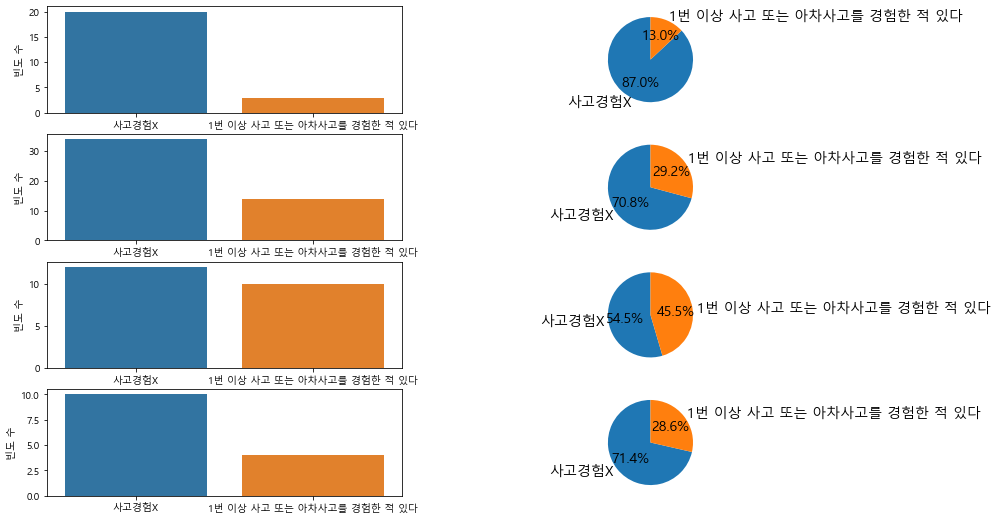

In [122]:
fig = plt.figure(figsize = (14,9))
ax1 = fig.add_subplot(4,2,1)
ax1 = sns.barplot(x = ['사고경험X', '1번 이상 사고 또는 아차사고를 경험한 적 있다'], y = '빈도 수', data = pm평균10분미만사고)

ax2 = fig.add_subplot(4,2,2)
ax2 = plt.pie(pm평균10분미만사고['비율'], labels= ['사고경험X', '1번 이상 사고 또는 아차사고를 경험한 적 있다'],
             autopct="%1.1f%%", textprops = {'fontsize': 14},startangle = 90)

ax3 = fig.add_subplot(4,2,3)
ax3 = sns.barplot(x = ['사고경험X', '1번 이상 사고 또는 아차사고를 경험한 적 있다'], y = '빈도 수', data = pm평균20분미만사고)

ax4 = fig.add_subplot(4,2,4)
ax4 = plt.pie(pm평균20분미만사고['비율'], labels= ['사고경험X', '1번 이상 사고 또는 아차사고를 경험한 적 있다'],
             autopct="%1.1f%%", textprops = {'fontsize': 14},startangle = 90)

ax5 = fig.add_subplot(4,2,5)
ax5 = sns.barplot(x =['사고경험X', '1번 이상 사고 또는 아차사고를 경험한 적 있다'], y = '빈도 수', data = pm평균30분미만사고)

ax6 = fig.add_subplot(4,2,6)
ax6 = plt.pie(pm평균30분미만사고['비율'], labels= ['사고경험X', '1번 이상 사고 또는 아차사고를 경험한 적 있다'],
             autopct="%1.1f%%", textprops = {'fontsize': 14},startangle = 90)

ax7 = fig.add_subplot(4,2,7)
ax7 = sns.barplot(x = ['사고경험X', '1번 이상 사고 또는 아차사고를 경험한 적 있다'], y = '빈도 수', data = pm평균30분이상사고)

ax8 = fig.add_subplot(4,2,8)
ax8 = plt.pie(pm평균30분이상사고['비율'], labels= ['사고경험X', '1번 이상 사고 또는 아차사고를 경험한 적 있다'],
             autopct="%1.1f%%", textprops = {'fontsize': 14},startangle = 90)

* 평균 주행 10분 미만인 이용자 중 13.0%는 1번이상 사고 또는 아차사고를 경험한 적 있다고 응답하였음.
* 평균 주행 20분 미만인 이용자 중 29.2%는 1번이상 사고 또는 아차사고를 경험한 적 있다고 응답하였음.
* 평균 주행 30분 미만인 이용자 중 45.5%는 1번이상 사고 또는 아차사고를 경험한 적 있다고 응답하였음.
* 평균 주행 30분 이상인 이용자 중 28.6%는 1번이상 사고 또는 아차사고를 경험한 적 있다고 응답하였음.

#### pm 이용자 이용시간별 - PM전용도로찬/반 교차분석

In [123]:
#이용시간별 찬반 
pm평균10분미만찬반 = pd.DataFrame(평균10분미만.groupby('PM전용도로찬/반')['빈도 수'].count()).sort_values(by='빈도 수', ascending=False)
pm평균10분미만찬반['비율'] = pm평균10분미만찬반['빈도 수'] / sum(pm평균10분미만찬반['빈도 수']) * 100

pm평균20분미만찬반 = pd.DataFrame(평균20분미만.groupby('PM전용도로찬/반')['빈도 수'].count()).sort_values(by='빈도 수', ascending=False)
pm평균20분미만찬반['비율'] = pm평균20분미만찬반['빈도 수'] / sum(pm평균20분미만찬반['빈도 수']) * 100

pm평균30분미만찬반 = pd.DataFrame(평균30분미만.groupby('PM전용도로찬/반')['빈도 수'].count()).sort_values(by='빈도 수', ascending=False)
pm평균30분미만찬반['비율'] = pm평균30분미만찬반['빈도 수'] / sum(pm평균30분미만찬반['빈도 수']) * 100

pm평균30분이상찬반 = pd.DataFrame(평균30분이상.groupby('PM전용도로찬/반')['빈도 수'].count()).sort_values(by='빈도 수', ascending=False)
pm평균30분이상찬반['비율'] = pm평균30분이상찬반['빈도 수'] / sum(pm평균30분이상찬반['빈도 수']) * 100


NameError: name '평균10분미만' is not defined

NameError: name 'pm평균10분미만찬반' is not defined

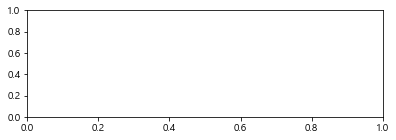

In [124]:
fig = plt.figure(figsize = (14,9))

ax1 = fig.add_subplot(4,2,1)
ax1 = sns.barplot(x = pm평균10분미만찬반.index, y = '빈도 수', data = pm평균10분미만찬반)

ax2 = fig.add_subplot(4,2,2)
ax2 = plt.pie(pm평균10분미만찬반['비율'], labels= pm평균10분미만찬반.index,
             autopct="%1.1f%%", textprops = {'fontsize': 14},startangle = 90)

ax3 = fig.add_subplot(4,2,3)
ax3 = sns.barplot(x = pm평균20분미만찬반.index, y = '빈도 수', data = pm평균10분미만찬반)

ax4 = fig.add_subplot(4,2,4)
ax4 = plt.pie(pm평균20분미만찬반['비율'], labels= pm평균20분미만찬반.index,
             autopct="%1.1f%%", textprops = {'fontsize': 14},startangle = 90)

ax5 = fig.add_subplot(4,2,5)
ax5 = sns.barplot(x = pm평균30분미만찬반.index, y = '빈도 수', data = pm평균30분미만찬반)

ax6 = fig.add_subplot(4,2,6)
ax6 = plt.pie(pm평균30분미만찬반['비율'], labels= pm평균30분미만찬반.index,
             autopct="%1.1f%%", textprops = {'fontsize': 14},startangle = 90)

ax7 = fig.add_subplot(4,2,7)
ax7 = sns.barplot(x = pm평균30분이상찬반.index, y = '빈도 수', data = pm평균30분이상찬반)

ax8 = fig.add_subplot(4,2,8)
ax8 = plt.pie(pm평균30분이상찬반['비율'], labels= pm평균30분이상찬반.index,
             autopct="%1.1f%%", textprops = {'fontsize': 14},startangle = 90)

#### pm 이용자 이용시간별 - PM전용도로 설치위치 교차분석

In [125]:
pm평균10분미만위치 = pd.DataFrame(pm평균10분미만.groupby('전용도로위치')['빈도 수'].count()).sort_values(by='빈도 수', ascending=False)
pm평균10분미만위치['비율'] = pm평균10분미만위치['빈도 수'] / sum(pm평균10분미만위치['빈도 수']) * 100

pm평균20분미만위치 = pd.DataFrame(pm평균20분미만.groupby('전용도로위치')['빈도 수'].count()).sort_values(by='빈도 수', ascending=False)
pm평균20분미만위치['비율'] = pm평균20분미만위치['빈도 수'] / sum(pm평균20분미만위치['빈도 수']) * 100

pm평균30분미만위치 = pd.DataFrame(pm평균30분미만.groupby('전용도로위치')['빈도 수'].count()).sort_values(by='빈도 수', ascending=False)
pm평균30분미만위치['비율'] = pm평균30분미만위치['빈도 수'] / sum(pm평균30분미만위치['빈도 수']) * 100

pm평균30분이상위치 = pd.DataFrame(pm평균30분이상.groupby('전용도로위치')['빈도 수'].count()).sort_values(by='빈도 수', ascending=False)
pm평균30분이상위치['비율'] = pm평균30분이상위치['빈도 수'] / sum(pm평균30분이상위치['빈도 수']) * 100

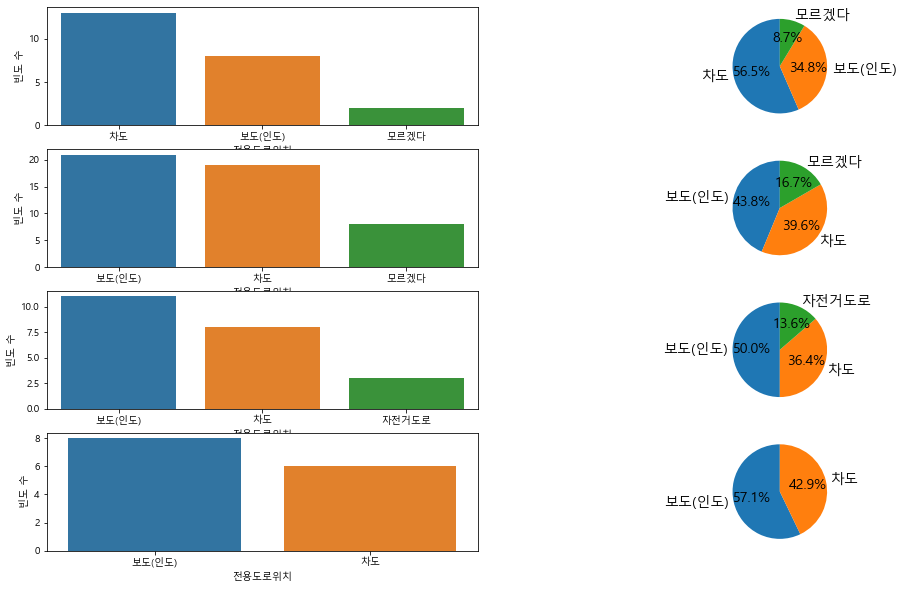

In [126]:
fig = plt.figure(figsize=(17,10))

ax1 = fig.add_subplot(4,2,1)
ax1 = sns.barplot(x = pm평균10분미만위치.index, y = '빈도 수', data = pm평균10분미만위치)

ax2 = fig.add_subplot(4,2,2)
ax2 = plt.pie(pm평균10분미만위치['비율'], labels= pm평균10분미만위치.index,
             autopct="%1.1f%%", textprops = {'fontsize': 14},startangle = 90)

ax3 = fig.add_subplot(4,2,3)
ax3 = sns.barplot(x = pm평균20분미만위치.index, y = '빈도 수', data = pm평균20분미만위치)

ax4 = fig.add_subplot(4,2,4)
ax4 = plt.pie(pm평균20분미만위치['비율'], labels= pm평균20분미만위치.index,
             autopct="%1.1f%%", textprops = {'fontsize': 14},startangle = 90)

ax5 = fig.add_subplot(4,2,5)
ax5 = sns.barplot(x = pm평균30분미만위치.index, y = '빈도 수', data = pm평균30분미만위치)

ax6 = fig.add_subplot(4,2,6)
ax6 = plt.pie(pm평균30분미만위치['비율'], labels= pm평균30분미만위치.index,
             autopct="%1.1f%%", textprops = {'fontsize': 14},startangle = 90)

ax7 = fig.add_subplot(4,2,7)
ax7 = sns.barplot(x = pm평균30분이상위치.index, y = '빈도 수', data = pm평균30분이상위치)

ax8 = fig.add_subplot(4,2,8)
ax8 = plt.pie(pm평균30분이상위치['비율'], labels= pm평균30분이상위치.index,
             autopct="%1.1f%%", textprops = {'fontsize': 14},startangle = 90)



#### PM 이용목적별 - 사고 교차분석

In [127]:
등하교 = df_이용자.loc[df_이용자['PM이용목적'] == '등하교(출퇴근)']
쇼핑 = df_이용자.loc[df_이용자['PM이용목적'] == '쇼핑 및 볼일']
레져 = df_이용자.loc[df_이용자['PM이용목적'] == '레져용']
정류장 = df_이용자.loc[df_이용자['PM이용목적'] == '정류장/지하철역 접근']
이동용 = df_이용자.loc[df_이용자['PM이용목적'] == '이동용']

In [128]:
등하교사고 = pd.DataFrame(등하교.groupby('PM사고경험')['빈도 수'].count()).sort_values(by='빈도 수', ascending=False)
등하교사고['비율'] = 등하교사고['빈도 수'] / sum(등하교사고['빈도 수']) * 100

쇼핑사고 = pd.DataFrame(쇼핑.groupby('PM사고경험')['빈도 수'].count()).sort_values(by='빈도 수', ascending=False)
쇼핑사고['비율'] = 쇼핑사고['빈도 수'] / sum(쇼핑사고['빈도 수']) * 100

레져사고 = pd.DataFrame(레져.groupby('PM사고경험')['빈도 수'].count()).sort_values(by='빈도 수', ascending=False)
레져사고['비율'] = 레져사고['빈도 수'] / sum(레져사고['빈도 수']) * 100

정류장사고 = pd.DataFrame(정류장.groupby('PM사고경험')['빈도 수'].count()).sort_values(by='빈도 수', ascending=False)
정류장사고['비율'] = 정류장사고['빈도 수'] / sum(정류장사고['빈도 수']) * 100

이동용사고 = pd.DataFrame(이동용.groupby('PM사고경험')['빈도 수'].count()).sort_values(by='빈도 수', ascending=False)
이동용사고['비율'] = 이동용사고['빈도 수'] / sum(이동용사고['빈도 수']) * 100

In [129]:
"등하교 ,쇼핑 , 레져, 정류장, 이동용"

'등하교 ,쇼핑 , 레져, 정류장, 이동용'

In [130]:
['사고경험X', '1번 이상 사고 또는 아차사고를 경험한 적 있다.']

['사고경험X', '1번 이상 사고 또는 아차사고를 경험한 적 있다.']

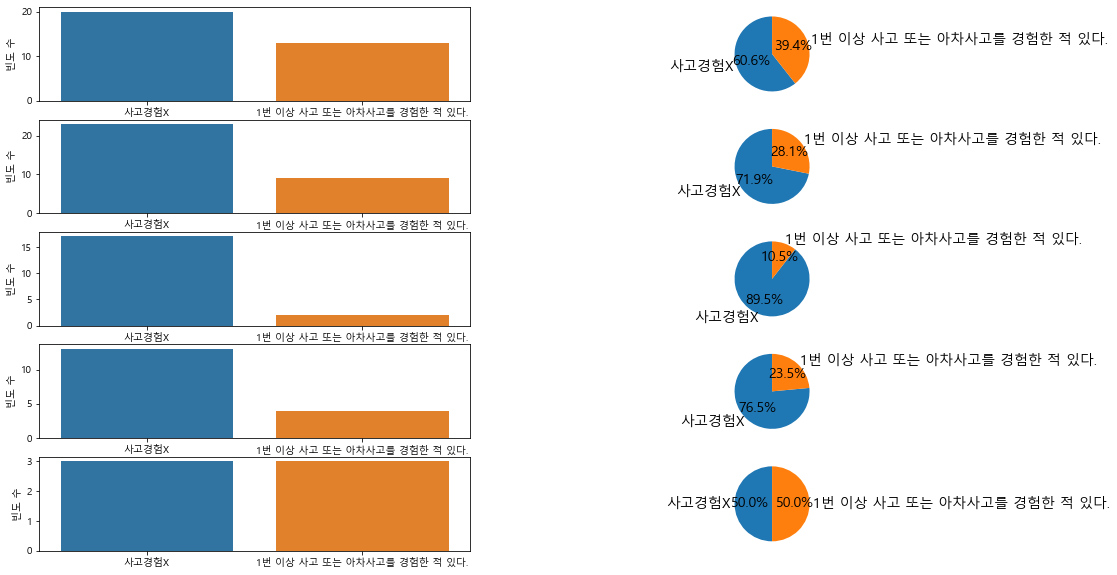

In [131]:
fig = plt.figure(figsize=(17,10))

ax1 = fig.add_subplot(5,2,1)
ax1 = sns.barplot(x = ['사고경험X', '1번 이상 사고 또는 아차사고를 경험한 적 있다.'], y = '빈도 수', data = 등하교사고)

ax2 = fig.add_subplot(5,2,2)
ax2 = plt.pie(등하교사고['비율'], labels= ['사고경험X', '1번 이상 사고 또는 아차사고를 경험한 적 있다.'],
             autopct="%1.1f%%", textprops = {'fontsize': 14},startangle = 90)

ax3 = fig.add_subplot(5,2,3)
ax3 = sns.barplot(x = ['사고경험X', '1번 이상 사고 또는 아차사고를 경험한 적 있다.'], y = '빈도 수', data = 쇼핑사고)

ax4 = fig.add_subplot(5,2,4)
ax4 = plt.pie(쇼핑사고['비율'], labels= ['사고경험X', '1번 이상 사고 또는 아차사고를 경험한 적 있다.'],
             autopct="%1.1f%%", textprops = {'fontsize': 14},startangle = 90)

ax5 = fig.add_subplot(5,2,5)
ax5 = sns.barplot(x = ['사고경험X', '1번 이상 사고 또는 아차사고를 경험한 적 있다.'], y = '빈도 수', data = 레져사고)

ax6 = fig.add_subplot(5,2,6)
ax6 = plt.pie(레져사고['비율'], labels= ['사고경험X', '1번 이상 사고 또는 아차사고를 경험한 적 있다.'],
             autopct="%1.1f%%", textprops = {'fontsize': 14},startangle = 90)

ax7 = fig.add_subplot(5,2,7)
ax7 = sns.barplot(x = ['사고경험X', '1번 이상 사고 또는 아차사고를 경험한 적 있다.'], y = '빈도 수', data = 정류장사고)

ax8 = fig.add_subplot(5,2,8)
ax8 = plt.pie(정류장사고['비율'], labels= ['사고경험X', '1번 이상 사고 또는 아차사고를 경험한 적 있다.'],
             autopct="%1.1f%%", textprops = {'fontsize': 14},startangle = 90)

ax9 = fig.add_subplot(5,2,9)
ax9 = sns.barplot(x = ['사고경험X', '1번 이상 사고 또는 아차사고를 경험한 적 있다.'], y = '빈도 수', data = 이동용사고)

ax10 = fig.add_subplot(5,2,10)
ax10 = plt.pie(이동용사고['비율'], labels= ['사고경험X', '1번 이상 사고 또는 아차사고를 경험한 적 있다.'],
             autopct="%1.1f%%", textprops = {'fontsize': 14},startangle = 90)

#### PM 이용목적별 - PM전용도로찬/반 교차분석

In [132]:
등하교찬반 = pd.DataFrame(등하교.groupby('PM전용도로찬/반')['빈도 수'].count()).sort_values(by='빈도 수', ascending=False)
등하교찬반['비율'] = 등하교찬반['빈도 수'] / sum(등하교찬반['빈도 수']) * 100 

쇼핑찬반 = pd.DataFrame(쇼핑.groupby('PM전용도로찬/반')['빈도 수'].count()).sort_values(by='빈도 수', ascending=False)
쇼핑찬반['비율'] = 쇼핑찬반['빈도 수'] / sum(쇼핑찬반['빈도 수']) * 100 

레져찬반 = pd.DataFrame(레져.groupby('PM전용도로찬/반')['빈도 수'].count()).sort_values(by='빈도 수', ascending=False)
레져찬반['비율'] = 레져찬반['빈도 수'] / sum(레져찬반['빈도 수']) * 100 

정류장찬반 = pd.DataFrame(정류장.groupby('PM전용도로찬/반')['빈도 수'].count()).sort_values(by='빈도 수', ascending=False)
정류장찬반['비율'] = 정류장찬반['빈도 수'] / sum(정류장찬반['빈도 수']) * 100 

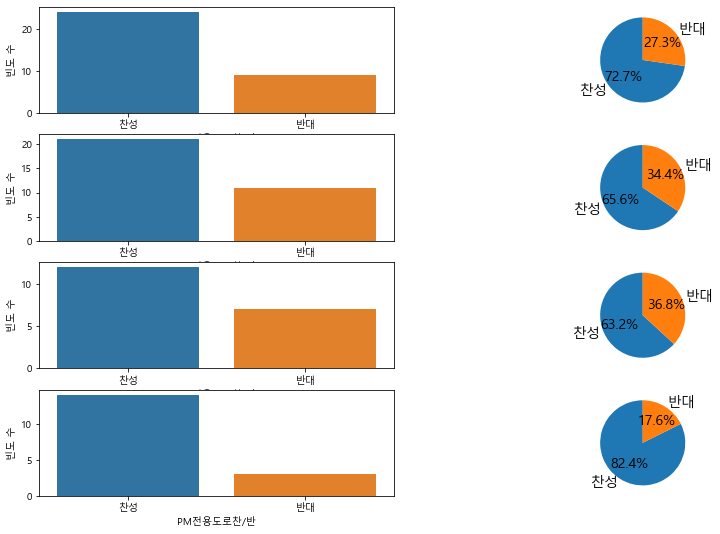

In [133]:
fig = plt.figure(figsize = (14,9))

ax1 = fig.add_subplot(4,2,1)
ax1 = sns.barplot(x = 등하교찬반.index, y = '빈도 수', data = 등하교찬반)

ax2 = fig.add_subplot(4,2,2)
ax2 = plt.pie(등하교찬반['비율'], labels= 등하교찬반.index,
             autopct="%1.1f%%", textprops = {'fontsize': 14},startangle = 90)

ax3 = fig.add_subplot(4,2,3)
ax3 = sns.barplot(x = 쇼핑찬반.index, y = '빈도 수', data = 쇼핑찬반)

ax4 = fig.add_subplot(4,2,4)
ax4 = plt.pie(쇼핑찬반['비율'], labels= 쇼핑찬반.index,
             autopct="%1.1f%%", textprops = {'fontsize': 14},startangle = 90)

ax5 = fig.add_subplot(4,2,5)
ax5 = sns.barplot(x = 레져찬반.index, y = '빈도 수', data = 레져찬반)

ax6 = fig.add_subplot(4,2,6)
ax6 = plt.pie(레져찬반['비율'], labels= 레져찬반.index,
             autopct="%1.1f%%", textprops = {'fontsize': 14},startangle = 90)

ax7 = fig.add_subplot(4,2,7)
ax7 = sns.barplot(x = 정류장찬반.index, y = '빈도 수', data = 정류장찬반)

ax8 = fig.add_subplot(4,2,8)
ax8 = plt.pie(정류장찬반['비율'], labels= 정류장찬반.index,
             autopct="%1.1f%%", textprops = {'fontsize': 14},startangle = 90)

#### PM 이용목적별 - PM전용도로 설치위치 교차분석

In [134]:
등하교위치 = pd.DataFrame(등하교.groupby('전용도로위치')['빈도 수'].count()).sort_values(by='빈도 수', ascending=False)
등하교위치['비율'] = 등하교위치['빈도 수'] / sum(등하교위치['빈도 수']) * 100

쇼핑위치 = pd.DataFrame(쇼핑.groupby('전용도로위치')['빈도 수'].count()).sort_values(by='빈도 수', ascending=False)
쇼핑위치['비율'] = 쇼핑위치['빈도 수'] / sum(쇼핑위치['빈도 수']) * 100

레져위치 = pd.DataFrame(레져.groupby('전용도로위치')['빈도 수'].count()).sort_values(by='빈도 수', ascending=False)
레져위치['비율'] = 레져위치['빈도 수'] / sum(레져위치['빈도 수']) * 100

정류장위치 = pd.DataFrame(정류장.groupby('전용도로위치')['빈도 수'].count()).sort_values(by='빈도 수', ascending=False)
정류장위치['비율'] = 정류장위치['빈도 수'] / sum(정류장위치['빈도 수']) * 100

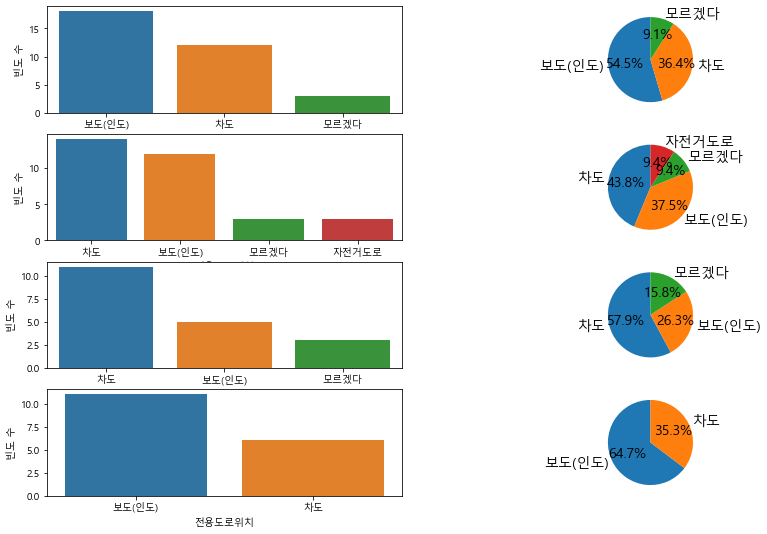

In [135]:
fig = plt.figure(figsize = (14,9))

ax1 = fig.add_subplot(4,2,1)
ax1 = sns.barplot(x = 등하교위치.index, y = '빈도 수', data = 등하교위치)

ax2 = fig.add_subplot(4,2,2)
ax2 = plt.pie(등하교위치['비율'], labels= 등하교위치.index,
             autopct="%1.1f%%", textprops = {'fontsize': 14},startangle = 90)

ax3 = fig.add_subplot(4,2,3)
ax3 = sns.barplot(x = 쇼핑위치.index, y = '빈도 수', data = 쇼핑위치)

ax4 = fig.add_subplot(4,2,4)
ax4 = plt.pie(쇼핑위치['비율'], labels= 쇼핑위치.index,
             autopct="%1.1f%%", textprops = {'fontsize': 14},startangle = 90)

ax5 = fig.add_subplot(4,2,5)
ax5 = sns.barplot(x = 레져위치.index, y = '빈도 수', data = 레져위치)

ax6 = fig.add_subplot(4,2,6)
ax6 = plt.pie(레져위치['비율'], labels= 레져위치.index,
             autopct="%1.1f%%", textprops = {'fontsize': 14},startangle = 90)

ax7 = fig.add_subplot(4,2,7)
ax7 = sns.barplot(x = 정류장위치.index, y = '빈도 수', data = 정류장위치)

ax8 = fig.add_subplot(4,2,8)
ax8 = plt.pie(정류장위치['비율'], labels= 정류장위치.index,
             autopct="%1.1f%%", textprops = {'fontsize': 14},startangle = 90)

In [136]:
pm남자 = df_이용자.loc[df_이용자['성별'] == '남자']
pm여자 = df_이용자.loc[df_이용자['성별'] == '여자']

In [137]:
df_이용자

,Unnamed: 0,작성일시,성별,연령,면허소지여부,면허취득기간,무면허이용,PM실제이용기간,PM얼마나자주,평균주행시간,...,PM주이용도로_이유,PM주이용도로_반대이유,PM개선사항,PM전용도로찬/반,전용도로찬/반_이유,전용도로위치,전용도로위치_이유,추가의견,빈도 수,PM사고경험
0,1,12-1-2021 17:48:49,남자,20대,예,5.0,예,6개월 이상 ~ 1년 미만,주 1회 미만,5,...,인도가 편해서,차도는 위험해서 잘 안다니게 됩니다,"도로/보도 환경 개선, 운영방식 개선 (방치 PM 즉시수거 등)",찬성,인도와 차도 모두 위험성이 있으므로 새로운 도로가필요함,차도,인도에는 자리가 없을듯,.,1,1
1,2,12-1-2021 18:17:42,남자,20대,아니오,0.0,예,1개월 이상 ~ 6개월 미만,주 1 ~ 2회,10,...,인도가 타기 편해서,차도는 위험하니깐?,"도로/보도 환경 개선, 운영방식 개선 (방치 PM 즉시수거 등)",반대,지금도 편하게 타고있는데 굳이 만들어야하나 싶음,차도,인도에는 만들공간이 없을거같다,"전동킥보드 두명 타는거 제지하는거랑, 아무데나 주차하는건 문제라고 생각함..",1,0
2,4,12-1-2021 20:40:32,여자,20대,아니오,0.0,예,6개월 이상 ~ 1년 미만,주 1 ~ 2회,25,...,차도는 위험하고 자전거도로는 많이 없어서,차도는 위험하고 자전거도로는 많이 없어서,"도로/보도 환경 개선, 대중교통 환승 연계",찬성,전용도로가 있다면 더 안전하고 편리할 것 같다.,보도(인도),차도는 사고가 날 위험이 더 높을 것 같다.,NaN,1,0
3,5,12-1-2021 22:30:59,남자,20대,예,6.0,예,1개월 미만,주 1회 미만,5,...,정류장에 가기 위해,위험해서,"사고시 보험 문제 개선, 도로/보도 환경 개선",찬성,보도에서도 천천히 주행해야해서,차도,차도쪽이 그나마 나아보입니다,NaN,1,0
4,6,12-1-2021 23:03:51,여자,20대,예,5.0,아니오,1개월 미만,주 1회 미만,20,...,편함,도로는 오토바이가 험하게 다님,"사고시 보험 문제 개선, 도로/보도 환경 개선",찬성,차량과 자전거 사이라 도로 사용 힘듦,보도(인도),자전거도로처럼 생기면 좋을 것 같음,정차하는 규정 필요.인도중앙에 둬 노약자 부상 우려있음,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,84,12-8-2021 22:35:36,여자,20대,예,5.0,아니오,1개월 미만,주 1회 미만,8,...,차도는 위험하다,걸어다녀요,"도로/보도 환경 개선, 편리성 증대(헬맷 미착용 등)",찬성,바퀴달린건 전용도로가 있어야한다고 생각함,보도(인도),차도 보다 안전할거 같아서,없음,1,0
103,93,12-1-2021 23:43:37,남자,20대,예,2.0,아니오,1개월 미만,주 1회 미만,16,...,안전해서?,무서워서,"사고시 보험 문제 개선, 도로/보도 환경 개선",찬성,사용자와 미사용자의 안전을 위해 필요함,보도(인도),차도는 너무 과함,NaN,1,0
104,96,12-8-2021 13:59:08,여자,20대,예,1.0,아니오,1개월 미만,주 1회 미만,15,...,차가 너무 위협적이다,미이용,"사고시 보험 문제 개선, 도로/보도 환경 개선",찬성,위험도,차도,인도는 보행자들의 길이기 때문,NaN,1,0
105,오프(50),NaN,남자,20대,아니오,0.0,예,1개월 미만,주 1회 미만,14,...,안전하니까,위험하니까,"사고시 보험문제 개선, 법 제도 개선(PM 정기점검 등)",찬성,안전하게 살기 위해서,모르겠다,자리가 필요하다고 생각,x,1,0


In [138]:
grouping = pd.DataFrame(df_이용자.groupby(['성별','전용도로위치'])['전용도로위치'].count())
grouping.unstack(1)

전용도로위치                   
전용도로위치   모르겠다 보도(인도) 자전거도로    차도
성별                              
남자        9.0   33.0   NaN  31.0
여자        1.0   15.0   3.0  15.0

In [139]:
mydata1 = grouping.sum()

In [140]:
grouping = grouping.unstack(1).fillna(0).T
grouping['1'] = 

SyntaxError: invalid syntax (Temp/ipykernel_19172/751338172.py, line 2)

Text(0, 0.5, '빈도 수')

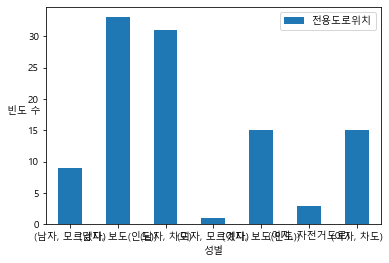

In [141]:
grouping.plot(kind='bar', rot = 0, alpha = 1, stacked=True)
plt.xlabel('성별')

plt.ylabel('빈도 수',rotation=0)


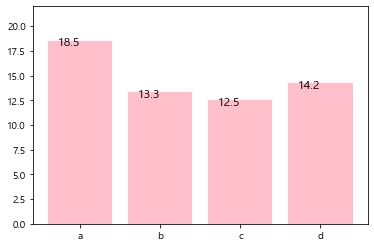

In [142]:
import matplotlib.pyplot as plt

x = ['a', 'b', 'c', 'd']
y = [18.5, 13.3, 12.5, 14.2]
bar = plt.bar(x,y, color='pink')
plt.ylim(0,22)

# 숫자 넣는 부분
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f'% height, ha = 'right',
             va='center_baseline', size=12)
    
    
    
    

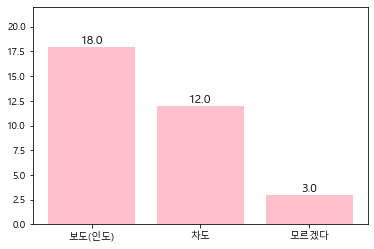

In [143]:
bar = plt.bar(x = 등하교위치.index, height = '빈도 수', data = 등하교위치, color='pink')
plt.ylim(0,22)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f'% height, ha = 'center',
             va='bottom', size=12)

In [144]:
rect.get_x()

1.6

In [145]:
rect.get_width()

0.8

In [146]:
 '%.1f'% height

'3.0'

In [147]:
plt.text()

TypeError: text() missing 3 required positional arguments: 'x', 'y', and 's'